# Etude Statistique

Problématique: Prédiction des entrées dans les cinémas français

Auteur:
- Boukharfien Zainab
- Houssoy Adrien
- Hurdebourcq Paul

Contexte: Nous cherchons à prédire le nombre d'entrées d'un cinéma sur l'année 2020 à l'aide de différentes variables caractéristiques.


## Installation et découverte de l'environement de travail

### Importations des bibliothèques

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ks_2samp
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from scipy.stats import normaltest, anderson
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

### Importation des données

In [3]:
data=pd.read_csv("../cinematographiques-propre.csv",sep=';',encoding='ANSI')
data.head()

,N° auto,nom,région administrative,adresse,code INSEE,commune,population de la commune,DEP,N°UU,unité urbaine,...,nombre de films en semaine 1,PdM en entrées des films français,PdM en entrées des films américains,PdM en entrées des films européens,PdM en entrées des autres films,films Art et Essai,PdM en entrées des films Art et Essai,latitude,longitude,geolocalisation
0,55,ELYSEES LINCOLN,ILE-DE-FRANCE,14 RUE LINCOLN,75108,Paris 8e Arrondissement,36694,75,851,Paris,...,53,"48,82847702","5,617302493","26,36427356","19,18994693",61,"87,62891759","48,870512","2,303157","48,870512,2,303157"
1,204,UGC OPERA,ILE-DE-FRANCE,32 BD DES ITALIENS,75109,Paris 9e Arrondissement,59408,75,851,Paris,...,41,"47,16468714","42,30156431","10,49210603","0,041642526",33,"53,34226535","48,871332","2,335302","48,871332,2,335302"
2,301,MAX LINDER,ILE-DE-FRANCE,24 BD POISSONNIERE,75109,Paris 9e Arrondissement,59408,75,851,Paris,...,8,"6,97058738","49,98399907","35,58607046","7,459343089",64,"53,67294097","48,871363","2,344886","48,871363,2,344886"
3,451,UGC MONTPARNASSE,ILE-DE-FRANCE,83 BD DU MONTPARNASSE,75106,Paris 6e Arrondissement,42428,75,851,Paris,...,63,"43,58109209","38,32192339","15,69030155","2,406682967",45,"39,64221679","48,84351","2,325646","48,84351,2,325646"
4,731,MK2 ODEON COTE SAINT-GERMAIN,ILE-DE-FRANCE,113 BD ST GERMAIN,75106,Paris 6e Arrondissement,42428,75,851,Paris,...,58,"55,90664627","24,3213105","13,33991217","6,43213105",48,"68,84195984","48,852437","2,338266","48,852437,2,338266"


### Présentation du jeu de données

In [4]:
print(f"Nombre de cinéma étudiées: {data.shape[0]}")
print(f"Nombre de caractéristiques (variable): {data.shape[1]}")

Nombre de cinéma étudiées: 2042
Nombre de caractéristiques (variable): 40


Le jeu de données dont nous disposons regroupe l'activité des cinémas français en 2020. Nous disposons d'une liste de 2042 cinéma et de 40 variables caractéristiques sur les performances du cinéma.
Les variables sont les suivantes:

- N° auto = Identifiant du cinéma
- nom = Nom du cinéma
- région administrative = Nom de la région
- adresse = Adresse du cinéma
- code INSEE = code insee du cinéma
- commune = Commune du cinéma
- population de la commune = Population de la commune du cinéma
- DEP = Numéro de département
- N°UU = Numéro de l'unité urbaine du cinéma
- unité urbaine = Unité urbaine du cinéma
- population unité urbaine = Population de l'unité urbaine du cinéma
- situation géographique = Localisation du cinéma
- écrans = Nombre d'écran dans le cinéma
- fauteuils = Nombre de fauteuils dans le cinéma
- semaines d'activité = Nombres de semaines où le cinéma a été ouvert
- séances = Nombre de séance du cinéma
- entrées 2020 = Nombres d'entrées en 2020
- entrées 2019 = Nombre d'entrée en 2019
- évolution entrées = Evolution des entrées entre 2019 et 2020
- tranche d'entrées = tranche du nombre d'entrée en 2020
- propriétaire = Nom du propriétaire du cinéma
- programmateur = Nom du programmateur des films diffusées
- AE = appartenance à la catégorie art et essai
- catégorie Art et Essai = catégorie des films art et essais
- label Art et Essai = label des film art et essai
- genre = mobilité du cinéma (fixe ou itinérant)
- multiplexe = appartenance à un multiplexe (oui/non)
- zone de la commune = zone de la comune du cinéma
- nombre de films programmés = Nombre de film programmé par le cinéma
- nombre de films inédits = nombre de film inédit diffusé
- nombre de films en semaine 1 = nombre de film en semaine 1 diffusé
- PdM en entrées des films français = part de marché des films français dans le cinéma
- PdM en entrées des films américains = part de marché des films américains dans le cinéma
- PdM en entrées des films européens = part de marché des films européens dans le cinéma
- PdM en entrées des autres films = part de marché des autres films dans le cinéma
- films Art et Essai = nombre de film art et essaie diffusé
- PdM en entrées des films Art et Essai = part de marché des films art et essai dans le cinéma
- latitude = latitude geographique du cinéma
- longitude = longitude geographqiue du cinéma
- geolocalisation = coordonnées geographique du cinéma



 ## Analyse exploratoire

### Pré-traitement

Nous allons d'abord vérifier si il n'y a pas de valeur manquante dans notre jeu de données.

Valeurs manquantes par caractéristique :
 N° auto                                     0
nom                                         0
région administrative                       0
adresse                                     1
code INSEE                                  0
commune                                     0
population de la commune                    0
DEP                                         0
N°UU                                        0
unité urbaine                               0
population unité urbaine                    0
situation géographique                      0
écrans                                      0
fauteuils                                   0
semaines d'activité                         0
séances                                     0
entrées 2020                                0
entrées 2019                                0
évolution entrées                           1
tranche d'entrées                           0
propriétaire                          

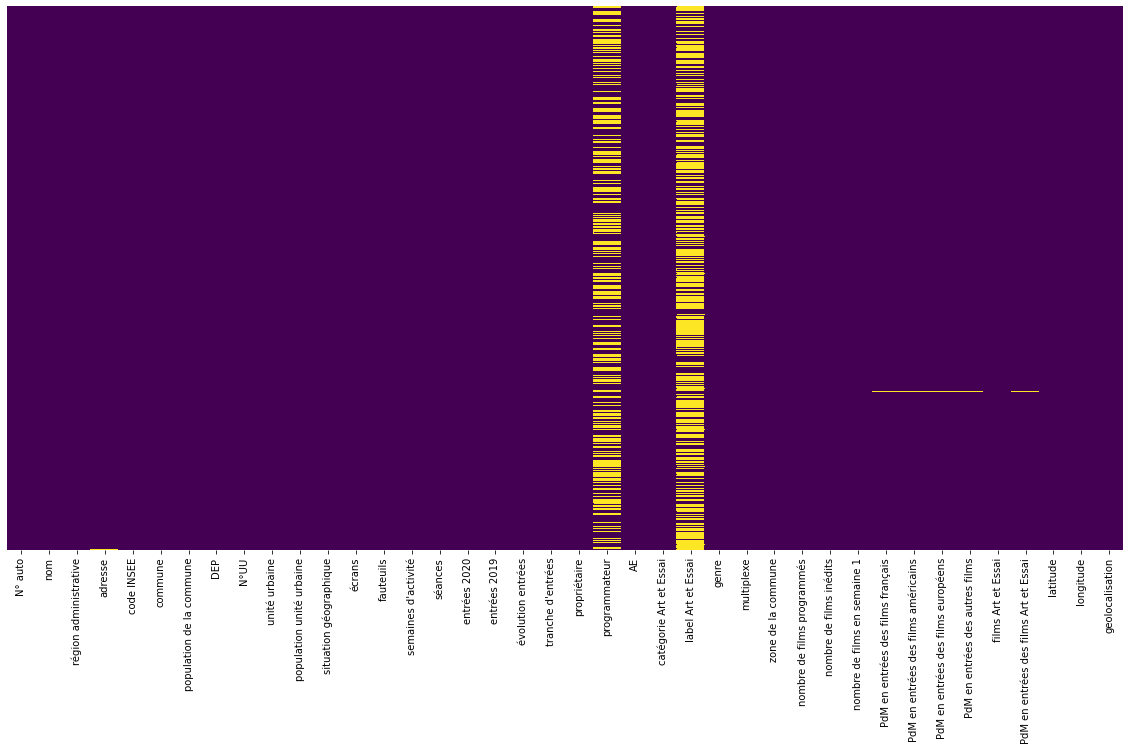

In [5]:
# Traitement des valeurs manquantes (vérification si elles existent).
missing_values = data.isnull().sum()
print("Valeurs manquantes par caractéristique :\n", missing_values)

plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

On remarque que les colonnes "label Art et Essai" et "programmateur" contiennent beaucoup de valeur manquantes (respectivement 1192 et 854). Ensuite, nous avons aussi d'autre variable comme les part de marché qui possèdent des valeur manquantes.
Pour éviter de polluer notre modèle, nous allons:
- supprimer la colonne "label Art et Essai" car plus de 50% des valeurs de la colonnes sont manquantes
- remplacer les valeurs manquantes des variables numérique par la médiane ou la moyenne
- remplacer les valeurs manquantes des variables "programmateur" avec un algorithme KNN
- supprimer la ligne avec l'adresse manquante car cela ne sera pas cohérents d'inventer 1 adresse ou de créer une adresse fictive qui pourrai fausser les résultats.

In [6]:
# suppression de la colonne "label Art et Essai"
data=data.drop(columns=['label Art et Essai'],axis=1)
# suppression de la ligne avec l'adresse null
data=data[data['adresse'].notna()]

#Vérification des suppressions
data.shape

(2041, 39)

#### Convertion des données

Avant de commencer à remplacer nos valeur manquantes, nous allons convertir nos données dans le type adéquats (texte, entier et décimal)

In [7]:
def convertion(df, typ, *var):
    """
    Fonction qui modifie le type des variables
    
    : param list data : les donnees
    : return : les data avec le bon type pour chaque var
    : rtype : list
    """
    types = ["str","int","float"]
    while typ not in types:
        typ = input("Type non reconnu, merci de choisir entre \"str\", \"int\" ou \"float\" \n►")
    for ele in var:
        if typ == "float" and "float" not in str(df[ele].dtype):
            df[ele] = df[ele].str.replace(",",".")
            df[ele] = df[ele].astype("float")
        elif typ not in str(df[ele].dtype):
            df[ele] = df[ele].astype(str(typ))
    return df

In [8]:
data = convertion(data, "str", 'N° auto','nom','adresse','région administrative','commune','code INSEE', 'DEP', 'unité urbaine', 'propriétaire','AE', 'catégorie Art et Essai','genre','multiplexe','geolocalisation',"programmateur")
data = convertion(data, "int", 'population de la commune','population unité urbaine','écrans', 'fauteuils', "semaines d'activité",'séances','entrées 2020','entrées 2019', 'nombre de films programmés','nombre de films inédits','nombre de films en semaine 1')
data = convertion(data, "float", 'évolution entrées', 'PdM en entrées des films français', 'PdM en entrées des films américains', 'PdM en entrées des films européens', 'PdM en entrées des autres films', 'PdM en entrées des films Art et Essai')

In [9]:
for col in data.columns:
    if "object" in str(data[col].dtype):
        print(f"{col}: texte")
    elif "int" in str(data[col].dtype):
        print(f"{col}: Entier")
    elif "float" in str(data[col].dtype):
        print(f"{col}: décimal")

N° auto: texte
nom: texte
région administrative: texte
adresse: texte
code INSEE: texte
commune: texte
population de la commune: Entier
DEP: texte
N°UU: texte
unité urbaine: texte
population unité urbaine: Entier
situation géographique: texte
écrans: Entier
fauteuils: Entier
semaines d'activité: Entier
séances: Entier
entrées 2020: Entier
entrées 2019: Entier
évolution entrées: décimal
tranche d'entrées: texte
propriétaire: texte
programmateur: texte
AE: texte
catégorie Art et Essai: texte
genre: texte
multiplexe: texte
zone de la commune: texte
nombre de films programmés: Entier
nombre de films inédits: Entier
nombre de films en semaine 1: Entier
PdM en entrées des films français: décimal
PdM en entrées des films américains: décimal
PdM en entrées des films européens: décimal
PdM en entrées des autres films: décimal
films Art et Essai: Entier
PdM en entrées des films Art et Essai: décimal
latitude: texte
longitude: texte
geolocalisation: texte


#### Imputation des valeurs manquantes

##### Variables qualitatives

Nous avons remarqué que la variable programmateur contenait beaucoup de valeurs manquantes. Nous avons donc décider de remplacer ces valeurs nulles à l'aide d'un algorithmes KNN qui va déterminer notre programmateur par rapport au 5 plus proche voisin.

In [10]:
#Encodage de la variable
le=LabelEncoder()
data["programmateur_encoded"]=le.fit_transform(data["programmateur"])
data.loc[data['programmateur'] == 'nan', 'programmateur_encoded'] = np.nan

#Imputation
imputer=KNNImputer(n_neighbors=5)
data["programmateur_encoded"]=imputer.fit_transform(np.array([data["programmateur_encoded"]]).reshape(-1,1))
data["programmateur_encoded"]=round(data["programmateur_encoded"],0)
data['programmateur'] = le.inverse_transform(data['programmateur_encoded'].astype("int"))
data=data.drop(columns=["programmateur_encoded"],axis=1)

##### Variables quantitatives

Nous avons remarqué que les variables ci-dessous possédait des valeurs manquantes. Etant des variables de types numérique, nous avons choisi de remplacer les valeurs nulles par la médiane de cette variable.

In [11]:
missing_values2=data.isnull().sum()
var_miss=list(missing_values2[missing_values2!=0].index)


In [12]:
for v in var_miss:
    print(v)
    data[v] = data[v].fillna(data[v].median())


évolution entrées
PdM en entrées des films français
PdM en entrées des films américains
PdM en entrées des films européens
PdM en entrées des autres films
PdM en entrées des films Art et Essai


Valeurs manquantes par caractéristique :
 N° auto                                  0
nom                                      0
région administrative                    0
adresse                                  0
code INSEE                               0
commune                                  0
population de la commune                 0
DEP                                      0
N°UU                                     0
unité urbaine                            0
population unité urbaine                 0
situation géographique                   0
écrans                                   0
fauteuils                                0
semaines d'activité                      0
séances                                  0
entrées 2020                             0
entrées 2019                             0
évolution entrées                        0
tranche d'entrées                        0
propriétaire                             0
programmateur                            0
AE          

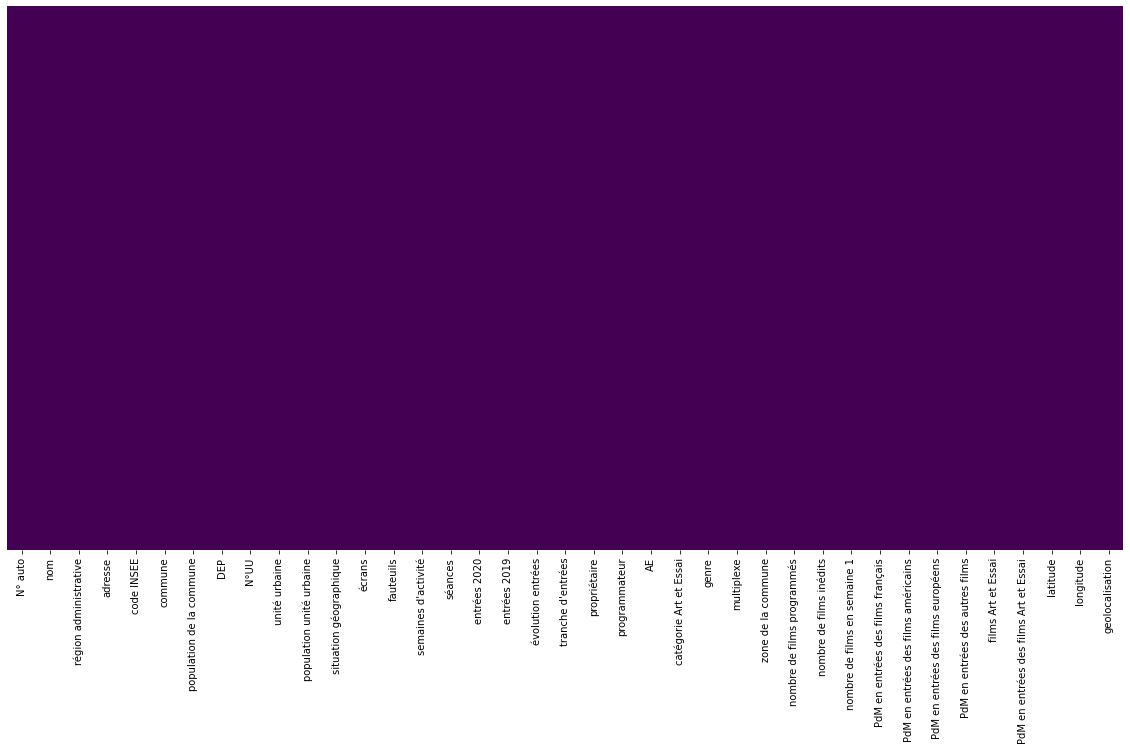

In [13]:
# Traitement des valeurs manquantes (vérification si elles existent).
missing_values = data.isnull().sum()
print("Valeurs manquantes par caractéristique :\n", missing_values)

plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### Analyse 

Dans cette partie, nous allons voir comment se comportent les variables de notre dataset. Nous allons d'abord les étuditer une part une, puis nous allons regarder les comparer entre afin de voir si certaines variables sont corrélées entre elles. 

#### Analyse univarié

Commençons par trier nos variables. Nous allons mettre d'un côté les variables qualitatives et de l'autre les variables quantitatives. Cette sépartation va nous permettre d'adapter nos analyses.

In [14]:
def tri_var(df):
  """
  Fonction qui sépare les variables qualitatives et quantitatives
  Param: 
    - data (Dataframe): jeu de données initial
  Return:
    - quali (liste) : liste des variables qualitatives
    - quanti (liste) :  liste des variables quantitatives
  """
  quanti=[]
  quali=[]
  df_col=df.columns
  for i in df_col:
    if 'float' in str(df[i].dtypes) or "int" in str(df[i].dtype):
      quanti.append(i)
    else:
      quali.append(i)

  return quali,quanti

In [15]:
var_quali, var_quanti = tri_var(data)
print("Variables qualitatives : ")
for v in var_quali:
    print(f"\t{v}")

print("\n")

print("Variables quantitatives : ")
for v in var_quanti:
    print(f"\t{v}")

Variables qualitatives : 
	N° auto
	nom
	région administrative
	adresse
	code INSEE
	commune
	DEP
	N°UU
	unité urbaine
	situation géographique
	tranche d'entrées
	propriétaire
	programmateur
	AE
	catégorie Art et Essai
	genre
	multiplexe
	zone de la commune
	latitude
	longitude
	geolocalisation


Variables quantitatives : 
	population de la commune
	population unité urbaine
	écrans
	fauteuils
	semaines d'activité
	séances
	entrées 2020
	entrées 2019
	évolution entrées
	nombre de films programmés
	nombre de films inédits
	nombre de films en semaine 1
	PdM en entrées des films français
	PdM en entrées des films américains
	PdM en entrées des films européens
	PdM en entrées des autres films
	films Art et Essai
	PdM en entrées des films Art et Essai


##### Analyse des variables quantitatives

In [16]:
def analyse_quanti(var,v,lst_transfo):
    """
    Fonction qui permet d'analyser de manière univarié les variables quantitatives
    Param:
        var: series statistique de la variable étudiés
        v: nom de la variable
        lst_transo: liste des variables à transformer
    Return: 
        lst_transfo: liste des variables à transformer
    """
    print(f"########################## Analyse de {v} ##########################")
    plt.figure(figsize=(12, 4))

    # Histogramme + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(var, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution de {v}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=var, color='lightcoral')
    plt.title(f'Boxplot de {v}')

    plt.tight_layout()
    plt.show()

    #Stats
    print("-------------------------------------")
    print("STATISTIQUES DESCRIPTIVES")
    print("-------------------------------------")
    print("La valeur minimum est : ", var.min())
    print("La valeur maximum est  : ", var.max())
    print(f"La moyenne de cette variable est : ", var.mean())
    print("Ecart-type : ", var.std(),f". \n C'est à dire que les valeurs sont écarté d'environ {var.std()} autour de la moyenne")
    print("Q1 ", var.quantile(0.25),f"\n C'est à dire que 25% des valeurs sont inférieur à {var.quantile(0.25)}.")
    print("Q2 : ", var.median(),f"\n C'est à dire que 50% des valeurs sont inférieur à {var.median()}.")
    print("Q3: ", var.quantile(0.75),f"\n C'est à dire que 75% des valeurs sont inférieur à {var.quantile(0.75)}.")
    print("Ecart interquartile :", var.quantile(0.75) - var.quantile(0.25),f"\n C'est à dire que 50% des valeurs sont comprise entre {var.quantile(0.25)} et {var.quantile(0.75)}.")

    print("\n-------------------------------------")
    print("QUANTILES EXTREMES")
    print("-------------------------------------")
    print("1% ", var.quantile(0.01))
    print("5% ", var.quantile(0.05))
    print("95% ", var.quantile(0.95))
    print("99% ", var.quantile(0.99))

    # Détection des valeurs aberrantes
    # Skewness
    skewness = skew(var)
    print("\n-------------------------------------")
    print("ASYMETRIE")
    print("-------------------------------------")
    print(f"Skewness de {v} : {skewness:.3f}")
    
    # Conseil en fonction de la skewness
    if skewness > 1:
        print("Distribution très asymétrique à droite. Une transformation log peut être envisagée.")
    elif skewness < -1:
        print("Distribution très asymétrique à gauche. Une transformation en racine carrée ou cube peut être testée.")
    elif abs(skewness) < 0.5:
        print("Distribution assez symétrique.")
    else:
        print("Distribution modérément asymétrique.")
    

    # Détection des outliers (règle des 1.5*IQR)
    Q1 = var.quantile(0.25)
    Q3 = var.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = var[(var < lower_bound) | (var > upper_bound)]

    # Conseil en fonction des outliers
    if len(outliers) > 0:
        print(f"{len(outliers)} valeurs aberrantes détectées pour {v}.")
    else:
        print(f"Aucune valeur aberrante détectée pour {v}.")

    if (skewness >1 or skewness<-1) and len(outliers)>0:
        lst_transfo.append(v)

    print("#" * 70,'\n')
    
    return lst_transfo

########################## Analyse de population de la commune ##########################


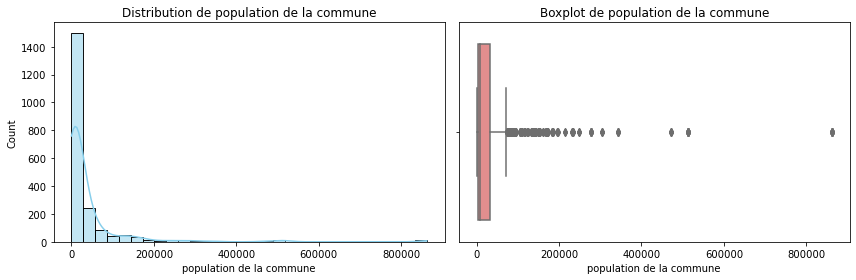

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  106
La valeur maximum est  :  861635
La moyenne de cette variable est :  38992.178833904945
Ecart-type :  95246.01244019452 . 
 C'est à dire que les valeurs sont écarté d'environ 95246.01244019452 autour de la moyenne
Q1  3896.0 
 C'est à dire que 25% des valeurs sont inférieur à 3896.0.
Q2 :  9651.0 
 C'est à dire que 50% des valeurs sont inférieur à 9651.0.
Q3:  31809.0 
 C'est à dire que 75% des valeurs sont inférieur à 31809.0.
Ecart interquartile : 27913.0 
 C'est à dire que 50% des valeurs sont comprise entre 3896.0 et 31809.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  341.0
5%  1048.0
95%  160649.0
99%  513275.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de population de la commune : 5.669
Distribution très asymétrique à droite. Une transformati

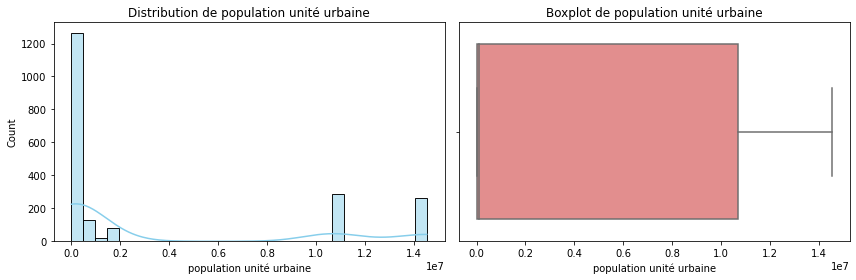

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  1951
La valeur maximum est  :  14541106
La moyenne de cette variable est :  3525742.5017148457
Ecart-type :  5554826.479791404 . 
 C'est à dire que les valeurs sont écarté d'environ 5554826.479791404 autour de la moyenne
Q1  9835.0 
 C'est à dire que 25% des valeurs sont inférieur à 9835.0.
Q2 :  91281.0 
 C'est à dire que 50% des valeurs sont inférieur à 91281.0.
Q3:  10706072.0 
 C'est à dire que 75% des valeurs sont inférieur à 10706072.0.
Ecart interquartile : 10696237.0 
 C'est à dire que 50% des valeurs sont comprise entre 9835.0 et 10706072.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  2376.6
5%  3496.0
95%  14541106.0
99%  14541106.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de population unité urbaine : 1.139
Distribution très asymétrique à dr

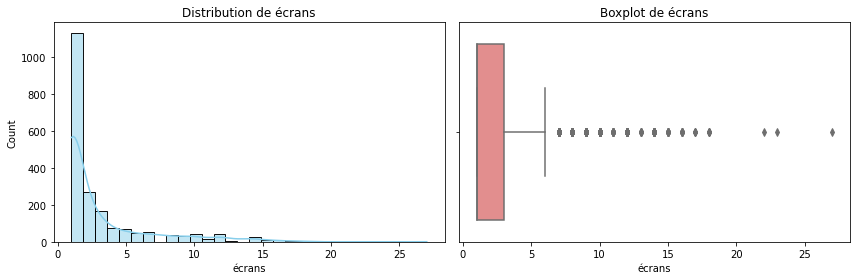

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  1
La valeur maximum est  :  27
La moyenne de cette variable est :  3.0019598236158744
Ecart-type :  3.517602247124237 . 
 C'est à dire que les valeurs sont écarté d'environ 3.517602247124237 autour de la moyenne
Q1  1.0 
 C'est à dire que 25% des valeurs sont inférieur à 1.0.
Q2 :  1.0 
 C'est à dire que 50% des valeurs sont inférieur à 1.0.
Q3:  3.0 
 C'est à dire que 75% des valeurs sont inférieur à 3.0.
Ecart interquartile : 2.0 
 C'est à dire que 50% des valeurs sont comprise entre 1.0 et 3.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1.0
5%  1.0
95%  12.0
99%  15.599999999999909

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de écrans : 2.244
Distribution très asymétrique à droite. Une transformation log peut être envisagée.
284 valeurs aberrantes dét

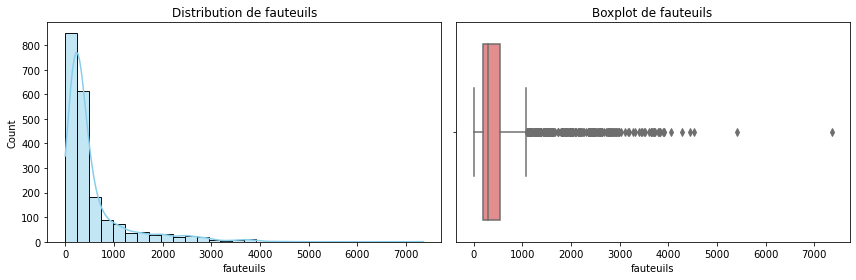

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  7358
La moyenne de cette variable est :  557.8294953454189
Ecart-type :  711.8306441928096 . 
 C'est à dire que les valeurs sont écarté d'environ 711.8306441928096 autour de la moyenne
Q1  187.0 
 C'est à dire que 25% des valeurs sont inférieur à 187.0.
Q2 :  288.0 
 C'est à dire que 50% des valeurs sont inférieur à 288.0.
Q3:  549.0 
 C'est à dire que 75% des valeurs sont inférieur à 549.0.
Ecart interquartile : 362.0 
 C'est à dire que 50% des valeurs sont comprise entre 187.0 et 549.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  100.0
95%  2200.0
99%  3578.7999999999925

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de fauteuils : 2.941
Distribution très asymétrique à droite. Une transformation log peut être envisagée.


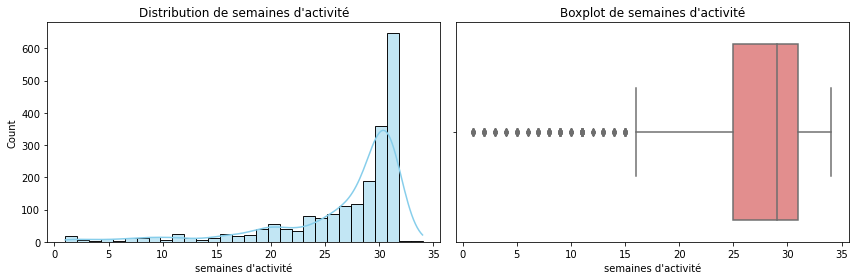

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  1
La valeur maximum est  :  34
La moyenne de cette variable est :  26.66780989710926
Ecart-type :  6.276503612924882 . 
 C'est à dire que les valeurs sont écarté d'environ 6.276503612924882 autour de la moyenne
Q1  25.0 
 C'est à dire que 25% des valeurs sont inférieur à 25.0.
Q2 :  29.0 
 C'est à dire que 50% des valeurs sont inférieur à 29.0.
Q3:  31.0 
 C'est à dire que 75% des valeurs sont inférieur à 31.0.
Ecart interquartile : 6.0 
 C'est à dire que 50% des valeurs sont comprise entre 25.0 et 31.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  3.0
5%  11.0
95%  31.0
99%  31.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de semaines d'activité : -2.008
Distribution très asymétrique à gauche. Une transformation en racine carrée ou cube peut être testée.


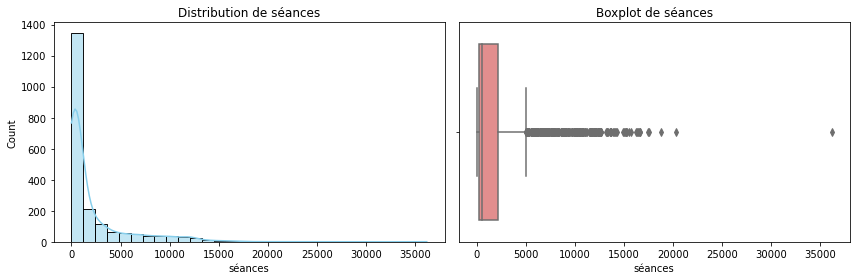

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  1
La valeur maximum est  :  36212
La moyenne de cette variable est :  2069.6932876041155
Ecart-type :  3397.9614996259475 . 
 C'est à dire que les valeurs sont écarté d'environ 3397.9614996259475 autour de la moyenne
Q1  209.0 
 C'est à dire que 25% des valeurs sont inférieur à 209.0.
Q2 :  511.0 
 C'est à dire que 50% des valeurs sont inférieur à 511.0.
Q3:  2143.0 
 C'est à dire que 75% des valeurs sont inférieur à 2143.0.
Ecart interquartile : 1934.0 
 C'est à dire que 50% des valeurs sont comprise entre 209.0 et 2143.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  9.0
5%  42.0
95%  10237.0
99%  14200.799999999994

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de séances : 2.587
Distribution très asymétrique à droite. Une transformation log peut être envis

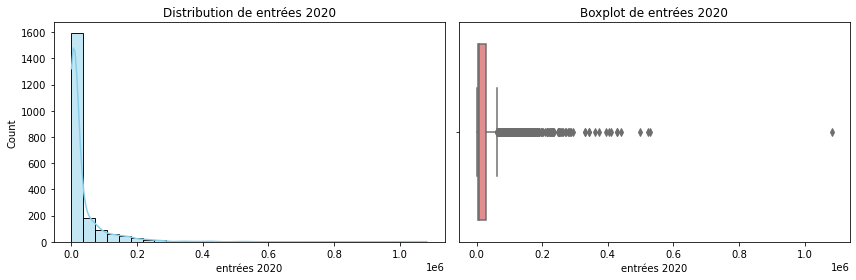

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  1082659
La moyenne de cette variable est :  31944.931896129347
Ecart-type :  62352.50095911656 . 
 C'est à dire que les valeurs sont écarté d'environ 62352.50095911656 autour de la moyenne
Q1  3747.0 
 C'est à dire que 25% des valeurs sont inférieur à 3747.0.
Q2 :  8612.0 
 C'est à dire que 50% des valeurs sont inférieur à 8612.0.
Q3:  27523.0 
 C'est à dire que 75% des valeurs sont inférieur à 27523.0.
Ecart interquartile : 23776.0 
 C'est à dire que 50% des valeurs sont comprise entre 3747.0 et 27523.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  390.0
5%  1204.0
95%  152244.0
99%  275759.5999999997

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de entrées 2020 : 5.236
Distribution très asymétrique à droite. Une transformation l

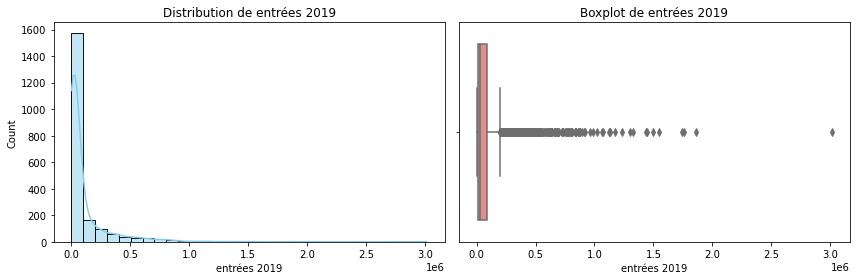

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  3012613
La moyenne de cette variable est :  104241.3704066634
Ecart-type :  208097.5150413887 . 
 C'est à dire que les valeurs sont écarté d'environ 208097.5150413887 autour de la moyenne
Q1  11031.0 
 C'est à dire que 25% des valeurs sont inférieur à 11031.0.
Q2 :  26414.0 
 C'est à dire que 50% des valeurs sont inférieur à 26414.0.
Q3:  85435.0 
 C'est à dire que 75% des valeurs sont inférieur à 85435.0.
Ecart interquartile : 74404.0 
 C'est à dire que 50% des valeurs sont comprise entre 11031.0 et 85435.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1148.8
5%  3428.0
95%  524903.0
99%  915071.9999999998

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de entrées 2019 : 4.509
Distribution très asymétrique à droite. Une transformat

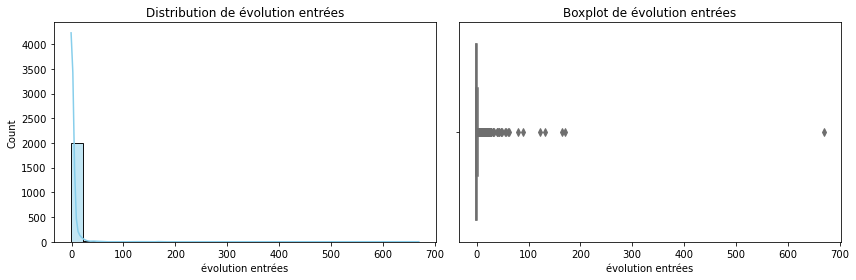

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  -1.0
La valeur maximum est  :  669.6
La moyenne de cette variable est :  1.6975703477719244
Ecart-type :  17.247105482253435 . 
 C'est à dire que les valeurs sont écarté d'environ 17.247105482253435 autour de la moyenne
Q1  -0.915517976 
 C'est à dire que 25% des valeurs sont inférieur à -0.915517976.
Q2 :  -0.6494152125 
 C'est à dire que 50% des valeurs sont inférieur à -0.6494152125.
Q3:  0.233556299 
 C'est à dire que 75% des valeurs sont inférieur à 0.233556299.
Ecart interquartile : 1.149074275 
 C'est à dire que 50% des valeurs sont comprise entre -0.915517976 et 0.233556299.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  -0.9979299537999999
5%  -0.990584493
95%  9.78948267
99%  31.783769487999987

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de évoluti

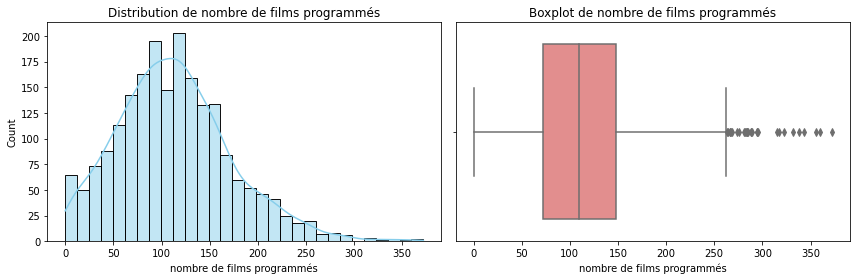

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  372
La moyenne de cette variable est :  113.40715335619794
Ecart-type :  59.06892225405328 . 
 C'est à dire que les valeurs sont écarté d'environ 59.06892225405328 autour de la moyenne
Q1  72.0 
 C'est à dire que 25% des valeurs sont inférieur à 72.0.
Q2 :  110.0 
 C'est à dire que 50% des valeurs sont inférieur à 110.0.
Q3:  148.0 
 C'est à dire que 75% des valeurs sont inférieur à 148.0.
Ecart interquartile : 76.0 
 C'est à dire que 50% des valeurs sont comprise entre 72.0 et 148.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  5.0
5%  22.0
95%  220.0
99%  278.99999999999955

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de nombre de films programmés : 0.585
Distribution modérément asymétrique.
29 valeurs aberrantes détectées pour

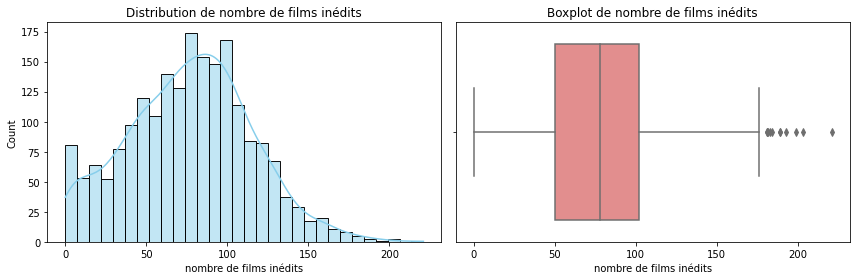

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  221
La moyenne de cette variable est :  76.75110240078394
Ecart-type :  38.17720267294575 . 
 C'est à dire que les valeurs sont écarté d'environ 38.17720267294575 autour de la moyenne
Q1  50.0 
 C'est à dire que 25% des valeurs sont inférieur à 50.0.
Q2 :  78.0 
 C'est à dire que 50% des valeurs sont inférieur à 78.0.
Q3:  102.0 
 C'est à dire que 75% des valeurs sont inférieur à 102.0.
Ecart interquartile : 52.0 
 C'est à dire que 50% des valeurs sont comprise entre 50.0 et 102.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  10.0
95%  139.0
99%  166.5999999999999

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de nombre de films inédits : 0.091
Distribution assez symétrique.
11 valeurs aberrantes détectées pour nombre de fi

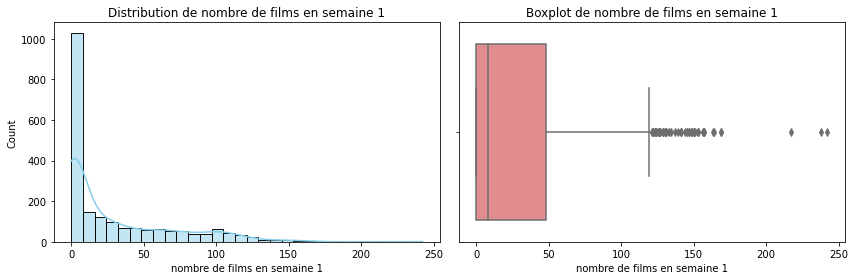

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  242
La moyenne de cette variable est :  28.935325820676137
Ecart-type :  39.05893901734837 . 
 C'est à dire que les valeurs sont écarté d'environ 39.05893901734837 autour de la moyenne
Q1  0.0 
 C'est à dire que 25% des valeurs sont inférieur à 0.0.
Q2 :  8.0 
 C'est à dire que 50% des valeurs sont inférieur à 8.0.
Q3:  48.0 
 C'est à dire que 75% des valeurs sont inférieur à 48.0.
Ecart interquartile : 48.0 
 C'est à dire que 50% des valeurs sont comprise entre 0.0 et 48.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  110.0
99%  147.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de nombre de films en semaine 1 : 1.458
Distribution très asymétrique à droite. Une transformation log peut être envisagée.
61 valeurs 

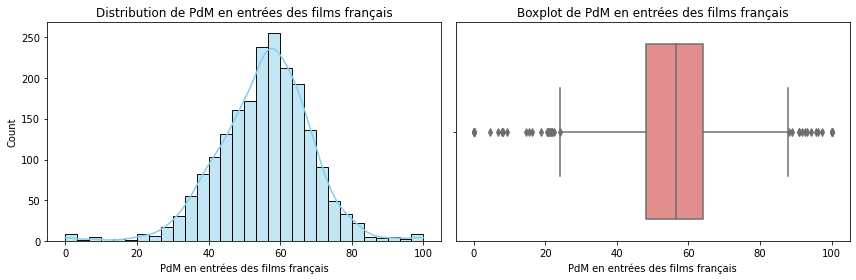

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  100.0
La moyenne de cette variable est :  55.680045418300786
Ecart-type :  13.06786914347076 . 
 C'est à dire que les valeurs sont écarté d'environ 13.06786914347076 autour de la moyenne
Q1  48.03956199 
 C'est à dire que 25% des valeurs sont inférieur à 48.03956199.
Q2 :  56.62241238 
 C'est à dire que 50% des valeurs sont inférieur à 56.62241238.
Q3:  64.0094247 
 C'est à dire que 75% des valeurs sont inférieur à 64.0094247.
Ecart interquartile : 15.969862709999994 
 C'est à dire que 50% des valeurs sont comprise entre 48.03956199 et 64.0094247.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  20.836960886
5%  34.71273019
95%  75.01629372
99%  86.6154080199999

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de PdM en entrées des fil

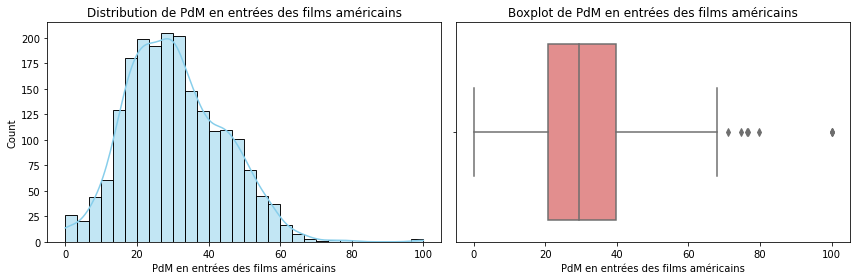

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  100.0
La moyenne de cette variable est :  30.77739530902786
Ecart-type :  13.62032439182199 . 
 C'est à dire que les valeurs sont écarté d'environ 13.62032439182199 autour de la moyenne
Q1  20.83550914 
 C'est à dire que 25% des valeurs sont inférieur à 20.83550914.
Q2 :  29.46193403 
 C'est à dire que 50% des valeurs sont inférieur à 29.46193403.
Q3:  39.87344739 
 C'est à dire que 75% des valeurs sont inférieur à 39.87344739.
Ecart interquartile : 19.037938250000003 
 C'est à dire que 50% des valeurs sont comprise entre 20.83550914 et 39.87344739.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.3272727272000017
5%  10.74633578
95%  54.06437534
99%  63.121310503999986

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de PdM en entré

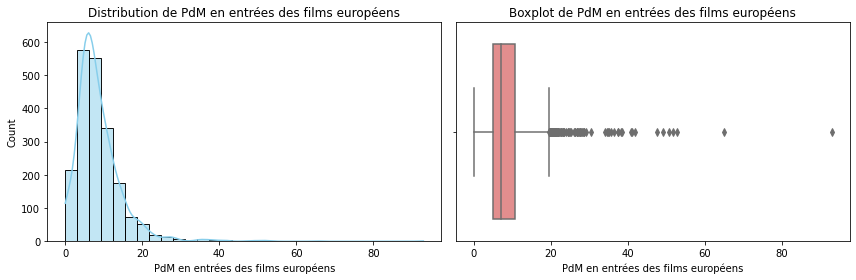

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  92.95933735
La moyenne de cette variable est :  8.562726065184716
Ecart-type :  6.273722362819384 . 
 C'est à dire que les valeurs sont écarté d'environ 6.273722362819384 autour de la moyenne
Q1  4.938271605 
 C'est à dire que 25% des valeurs sont inférieur à 4.938271605.
Q2 :  7.240745135 
 C'est à dire que 50% des valeurs sont inférieur à 7.240745135.
Q3:  10.84313335 
 C'est à dire que 75% des valeurs sont inférieur à 10.84313335.
Ecart interquartile : 5.904861745000001 
 C'est à dire que 50% des valeurs sont comprise entre 4.938271605 et 10.84313335.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  1.383399209
95%  19.06438205
99%  30.00456416199988

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de PdM en entrées des film

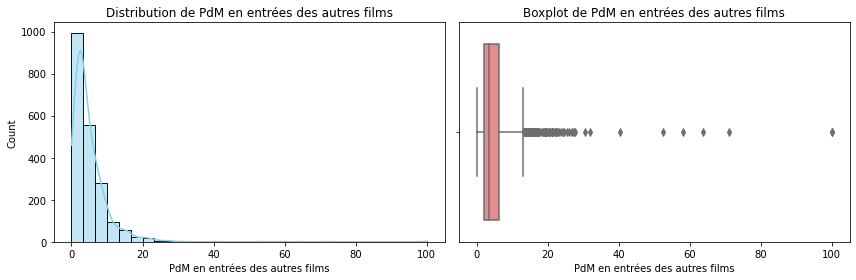

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  100.0
La moyenne de cette variable est :  4.9766574328569275
Ecart-type :  5.907984840437188 . 
 C'est à dire que les valeurs sont écarté d'environ 5.907984840437188 autour de la moyenne
Q1  1.957585644 
 C'est à dire que 25% des valeurs sont inférieur à 1.957585644.
Q2 :  3.434030467 
 C'est à dire que 50% des valeurs sont inférieur à 3.434030467.
Q3:  6.436843523 
 C'est à dire que 75% des valeurs sont inférieur à 6.436843523.
Ecart interquartile : 4.479257879 
 C'est à dire que 50% des valeurs sont comprise entre 1.957585644 et 6.436843523.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  14.1097999
99%  22.504427719999978

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de PdM en entrées des autres films : 6.697
Di

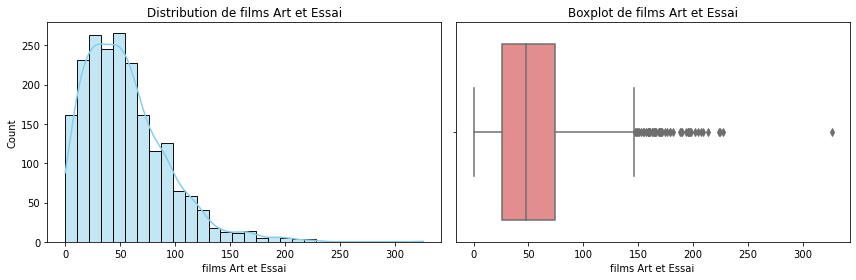

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0
La valeur maximum est  :  326
La moyenne de cette variable est :  54.51690347868692
Ecart-type :  37.93837667740488 . 
 C'est à dire que les valeurs sont écarté d'environ 37.93837667740488 autour de la moyenne
Q1  26.0 
 C'est à dire que 25% des valeurs sont inférieur à 26.0.
Q2 :  48.0 
 C'est à dire que 50% des valeurs sont inférieur à 48.0.
Q3:  74.0 
 C'est à dire que 75% des valeurs sont inférieur à 74.0.
Ecart interquartile : 48.0 
 C'est à dire que 50% des valeurs sont comprise entre 26.0 et 74.0.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.40000000000000213
5%  7.0
95%  122.0
99%  177.79999999999973

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de films Art et Essai : 1.272
Distribution très asymétrique à droite. Une transformation log peut être

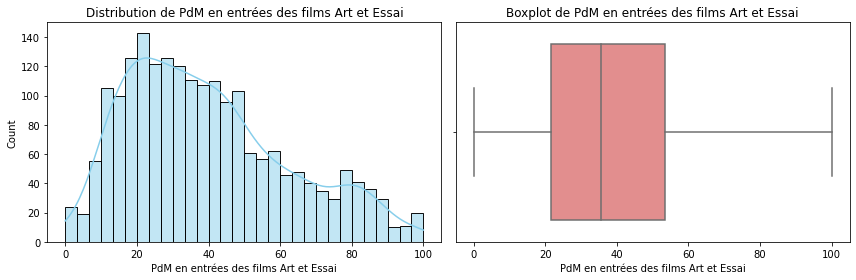

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  100.0
La moyenne de cette variable est :  39.72052891264481
Ecart-type :  22.609434568090958 . 
 C'est à dire que les valeurs sont écarté d'environ 22.609434568090958 autour de la moyenne
Q1  21.71500366 
 C'est à dire que 25% des valeurs sont inférieur à 21.71500366.
Q2 :  35.72687225 
 C'est à dire que 50% des valeurs sont inférieur à 35.72687225.
Q3:  53.4505265 
 C'est à dire que 75% des valeurs sont inférieur à 53.4505265.
Ecart interquartile : 31.73552284 
 C'est à dire que 50% des valeurs sont comprise entre 21.71500366 et 53.4505265.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1.4736516158000004
5%  10.14687136
95%  83.63735276
99%  95.66933310999995

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de PdM en entrées des fi

In [17]:
var_tranfo=[]
for v in var_quanti:
    data_var=data[v]
    var_tranfo=analyse_quanti(data_var,v,var_tranfo)

De manière général, on remarque que sur toutes nos variables quantitatives, nous possédons beaucoup de caractéristique avec des valeurs aberrantes. La création de ces valeurs abérrantes sont majoritairement dues à une asymétrie de la distribution de notre variable (asymétrie à gauche pour la plupart). C'est à dire que la concentration de nos observations vers de valeurs faibles fait que les valeurs hautes peuvent biaisé l'interprétation de certain indicateur (comme la moyenne) ou les résultats de notre modèle.

Pour corriger ces valeurs abérrantes, nous essayer d'appliquer une transformation logarithmes sur nos variables. Nous devrons corriger les variables suivantes :

In [18]:
for i in var_tranfo:
    print(i)

population de la commune
écrans
fauteuils
semaines d'activité
séances
entrées 2020
entrées 2019
évolution entrées
nombre de films en semaine 1
PdM en entrées des films européens
PdM en entrées des autres films
films Art et Essai


In [19]:
def analyse_quali(var,v):
    """
    Fonction qui permet d'analyser de manière univarié les variables quantitatives
    Param:
        var: series statistique de la variable étudiés
        v: nom de la variable
        lst_transo: liste des variables à transformer

    """
    print(f"########################## Analyse de {v} ##########################")
    effectifs =var.value_counts(dropna=False)
    
    # Table des fréquences
    freq = var.value_counts(normalize=True, dropna=False) * 100
    
    # Combinaison en un tableau
    tableau = pd.DataFrame({'Effectif': effectifs, 'Fréquence (%)': freq.round(2)})
    if tableau.iloc[0,0]!=1:
        print("-------------------------------------")
        print("TOP 10 des effectifs et des fréquences")
        print("-------------------------------------")
        print(tableau.head(10))

        print("-------------------------------------")
        print("Mode de la variable")
        print("-------------------------------------")
        print(f"Valeur la plus présentes dans la série: {tableau.index[0]}")

        
        # Graphique à barres
        plt.figure(figsize=(15,15))
        sns.countplot(x=var, order=effectifs.index, palette="Set2")
        plt.title(f"Diagramme en barres - {v}")
        plt.ylabel("Effectif")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print("Cette variable n'est pas analysable car propre pour chaque cinéma")


    

    print("#" * 70,'\n')

########################## Analyse de N° auto ##########################
Cette variable n'est pas analysable car propre pour chaque cinéma
###################################################################### 

########################## Analyse de nom ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                   Effectif  Fréquence (%)
REX                      33           1.62
MEGA CGR                 29           1.42
SALLE DES FETES          21           1.03
PATHE                    21           1.03
CASINO                   18           0.88
VOX                      17           0.83
SALLE POLYVALENTE        13           0.64
CINEVILLE                11           0.54
LE CLUB                  11           0.54
GAUMONT                  10           0.49
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la sé

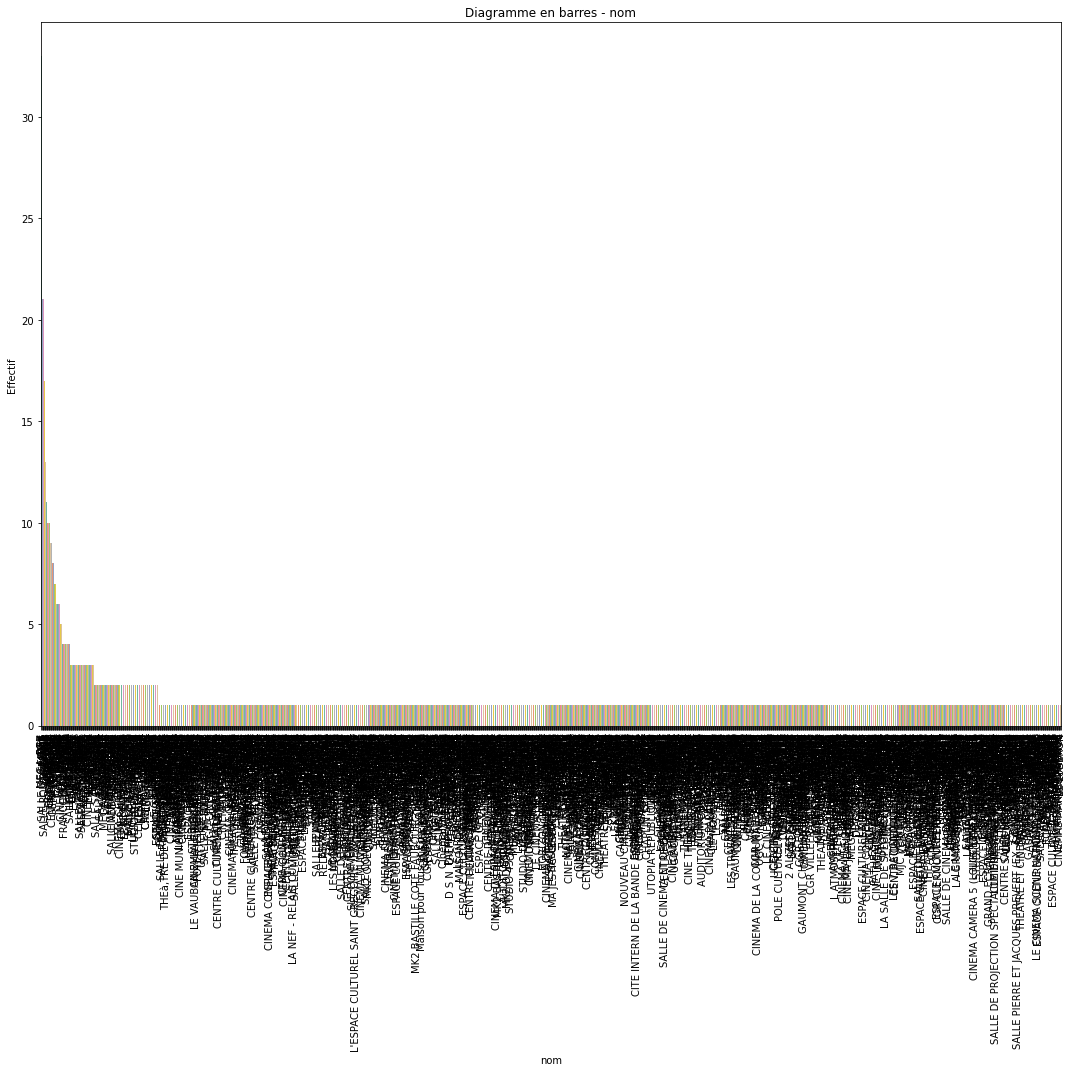

###################################################################### 

########################## Analyse de région administrative ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                            Effectif  Fréquence (%)
AUVERGNE / RHONE-ALPES           323          15.83
ILE-DE-FRANCE                    310          15.19
NOUVELLE AQUITAINE               228          11.17
OCCITANIE                        216          10.58
PROVENCE-ALPES-COTE D'AZUR       194           9.51
PAYS DE LA LOIRE                 125           6.12
HAUTS DE FRANCE                  121           5.93
BRETAGNE                         121           5.93
GRAND EST                        121           5.93
NORMANDIE                        103           5.05
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: AUVERGNE / RHONE-

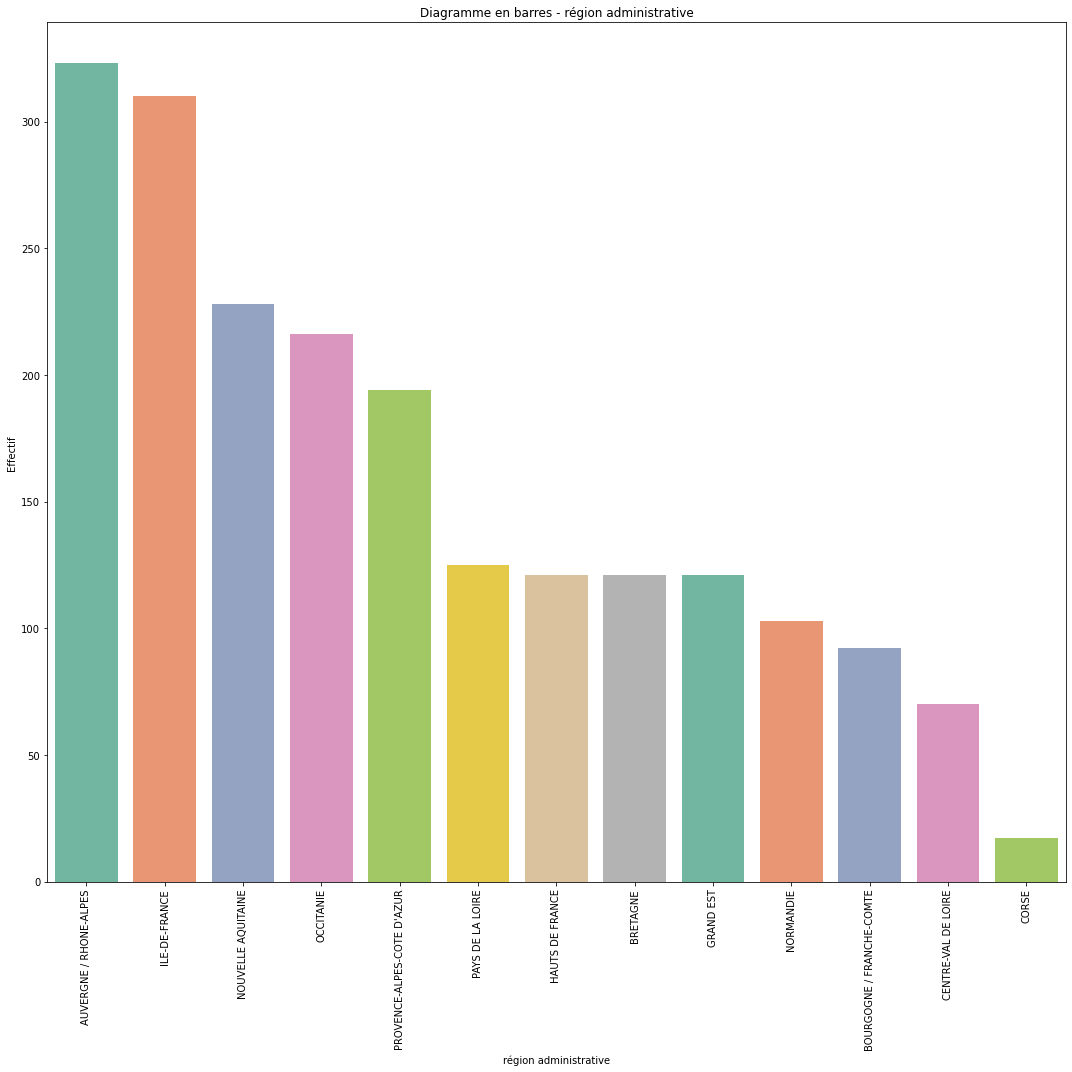

###################################################################### 

########################## Analyse de adresse ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                            Effectif  Fréquence (%)
SALLE DES FETES                   16           0.78
PLACE DE LA MAIRIE                 9           0.44
SALLE POLYVALENTE                  9           0.44
PLACE DU 8 MAI 1945                9           0.44
PLACE DU GENERAL DE GAULLE         6           0.29
PLACE CHARLES DE GAULLE            6           0.29
RUE DES ECOLES                     6           0.29
PLACE DE L HOTEL DE VILLE          6           0.29
AVENUE DE LA GARE                  5           0.24
LE BOURG                           5           0.24
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: SALLE DES FETES


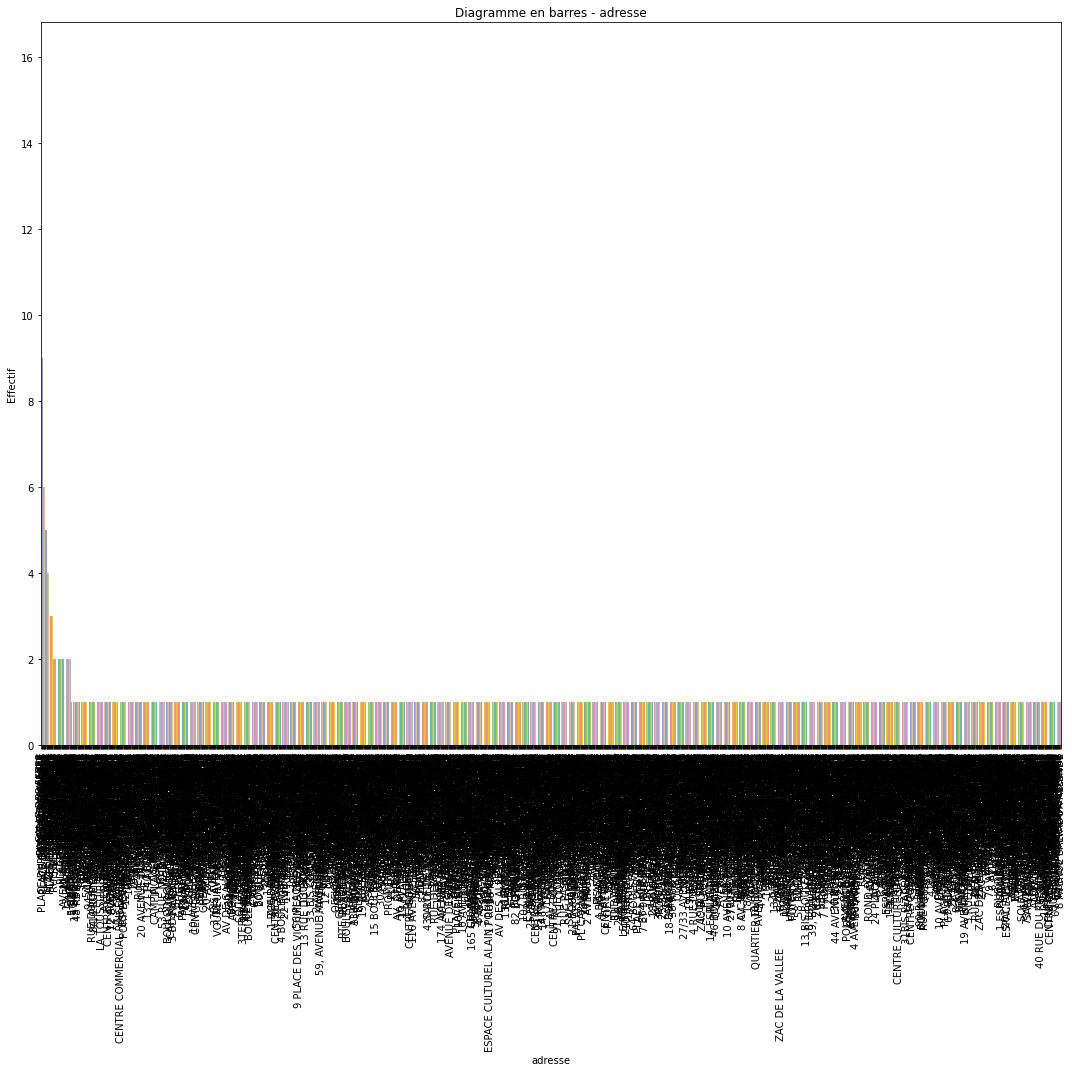

###################################################################### 

########################## Analyse de code INSEE ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
       Effectif  Fréquence (%)
75106        15           0.73
69123        15           0.73
13055        13           0.64
75105        10           0.49
6029          8           0.39
6088          7           0.34
75108         7           0.34
63113         6           0.29
75114         6           0.29
74010         6           0.29
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: 75106


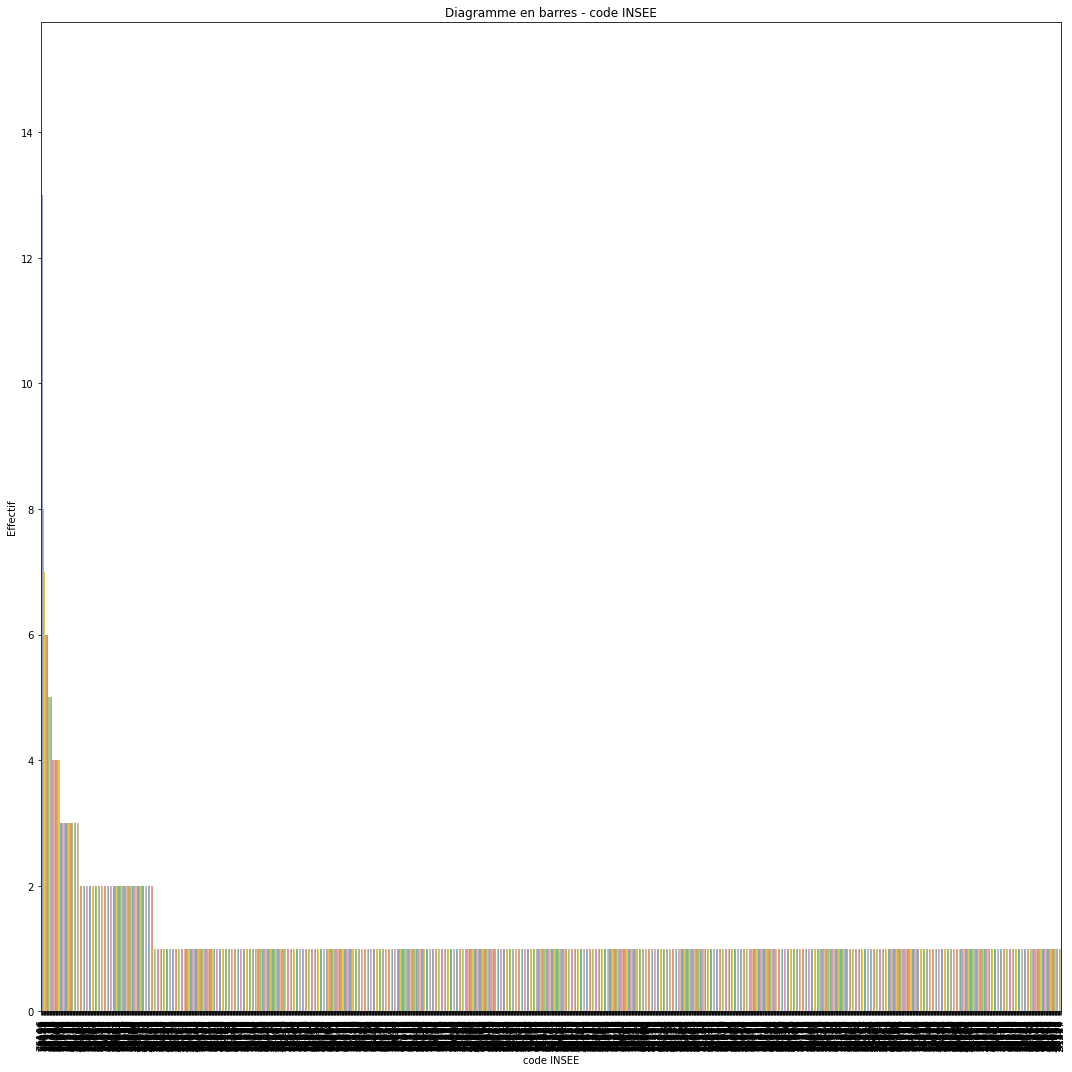

###################################################################### 

########################## Analyse de commune ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                          Effectif  Fréquence (%)
Paris 6e Arrondissement         15           0.73
Lyon                            15           0.73
Marseille                       13           0.64
Paris 5e Arrondissement         10           0.49
Cannes                           8           0.39
Paris 8e Arrondissement          7           0.34
Nice                             7           0.34
Paris 14e Arrondissement         6           0.29
Clermont-Ferrand                 6           0.29
Montpellier                      6           0.29
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: Paris 6e Arrondissement


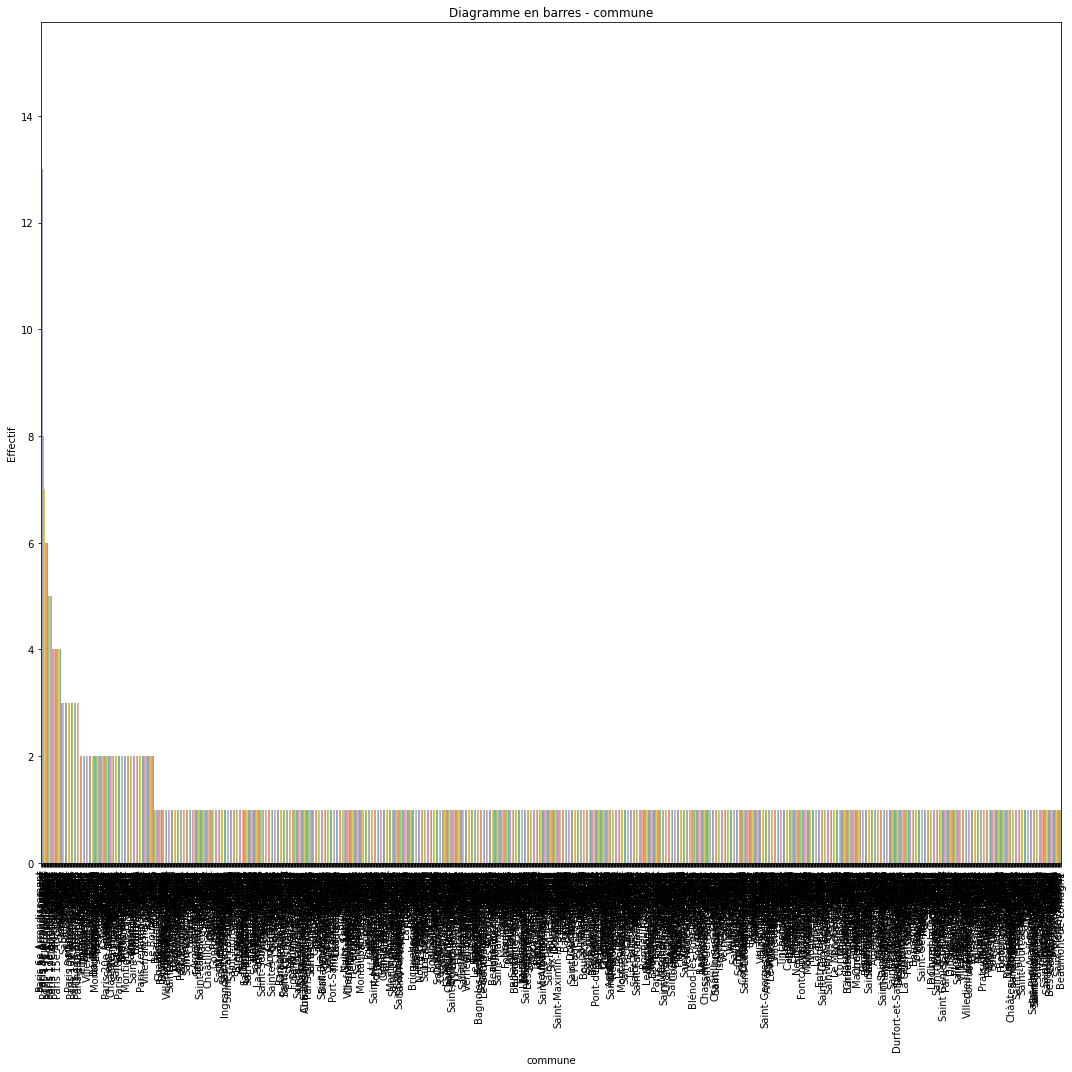

###################################################################### 

########################## Analyse de DEP ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
    Effectif  Fréquence (%)
75        78           3.82
13        55           2.69
69        51           2.50
44        49           2.40
38        47           2.30
73        47           2.30
33        46           2.25
59        46           2.25
35        44           2.16
92        42           2.06
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: 75


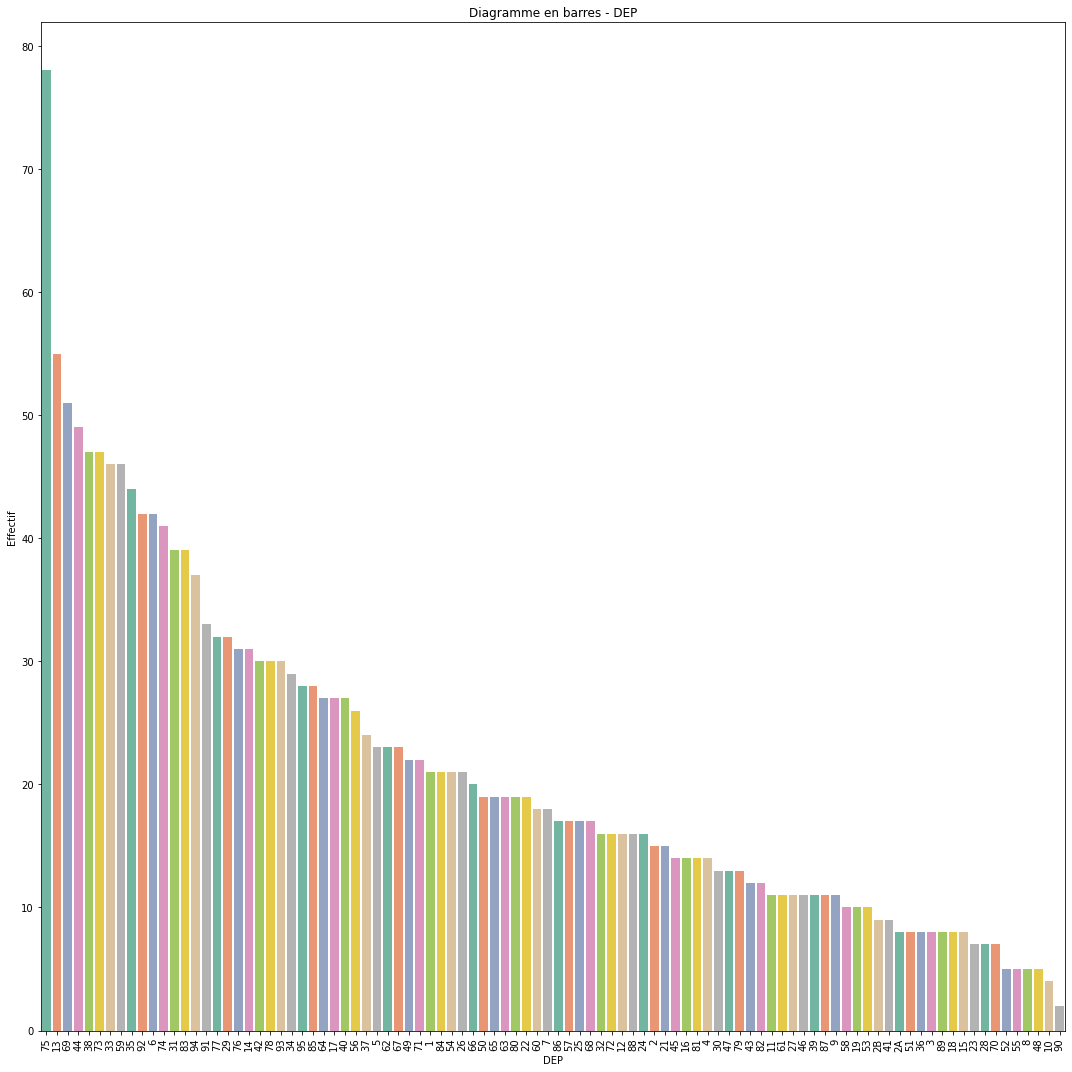

###################################################################### 

########################## Analyse de N°UU ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
       Effectif  Fréquence (%)
851         288          14.11
0           260          12.74
758          45           2.20
6701         35           1.71
759          34           1.67
31701        25           1.22
33701        19           0.93
59702        18           0.88
757          16           0.78
44701        15           0.73
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: 851


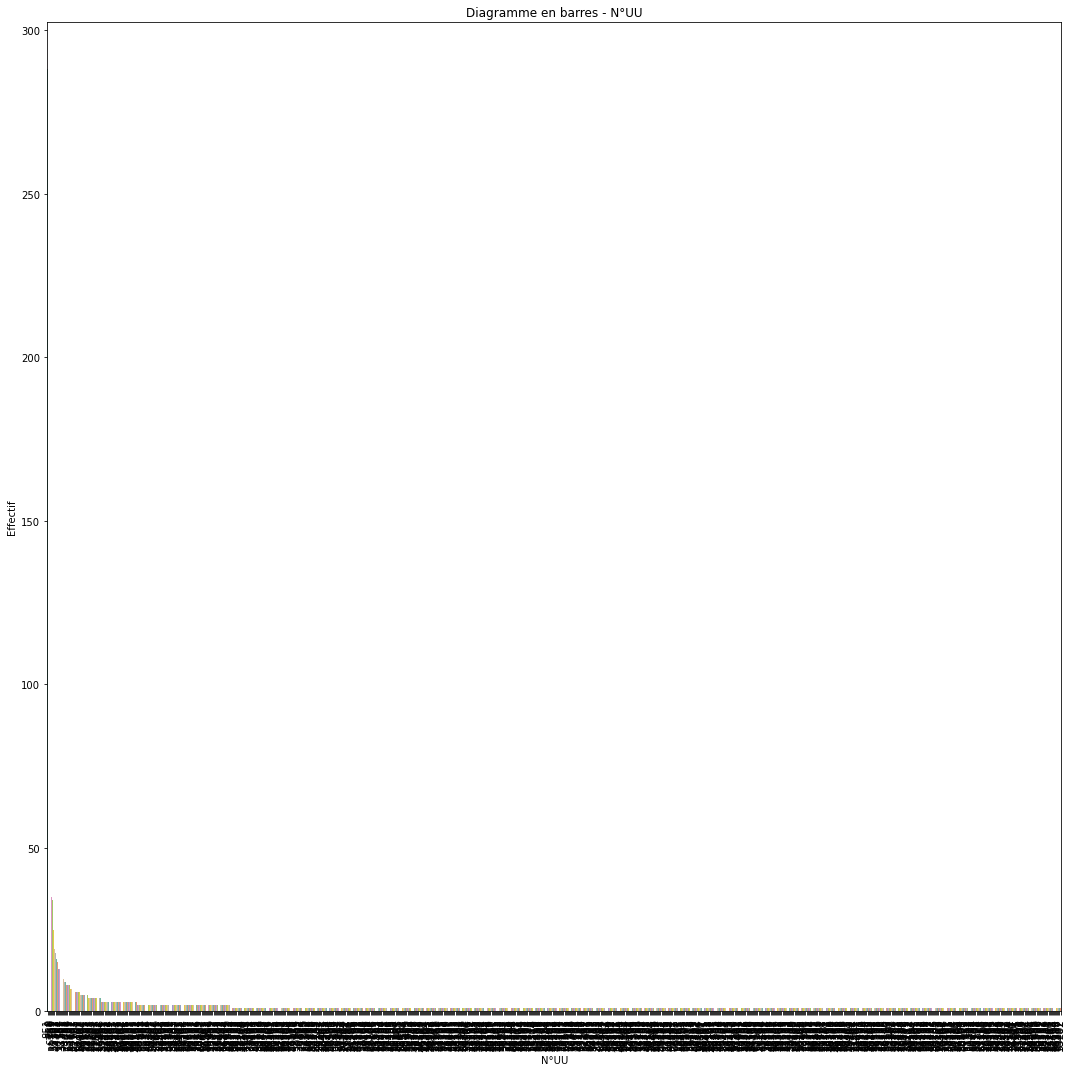

###################################################################### 

########################## Analyse de unité urbaine ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                             Effectif  Fréquence (%)
Paris                             288          14.11
Zone rurale                       260          12.74
Lyon                               45           2.20
Nice                               35           1.71
Marseille - Aix-en-Provence        34           1.67
Toulouse                           25           1.22
Bordeaux                           19           0.93
Lille (partie française)           18           0.88
Toulon                             16           0.78
Nantes                             15           0.73
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: Paris


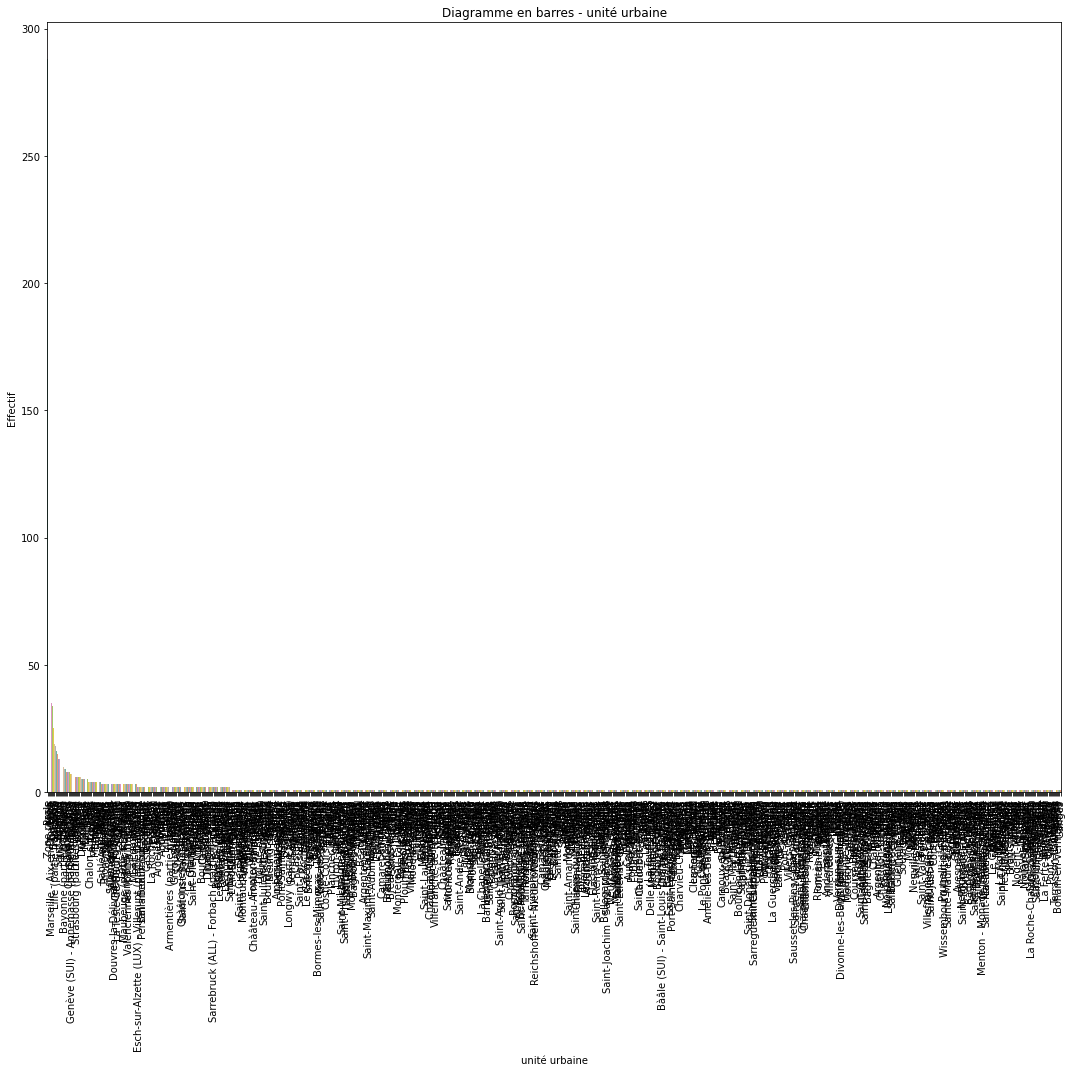

###################################################################### 

########################## Analyse de situation géographique ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                                              Effectif  Fréquence (%)
04-Unités urbaines de 100 000 hbts ou plus         721          35.33
06-autres communes et unités urbaines              712          34.88
05-Unités urbaines de 20 000 à  100 000 hbts       298          14.60
03-Petite couronne                                 123           6.03
02-Grande Couronne                                 109           5.34
01-Paris                                            78           3.82
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: 04-Unités urbaines de 100 000 hbts ou plus


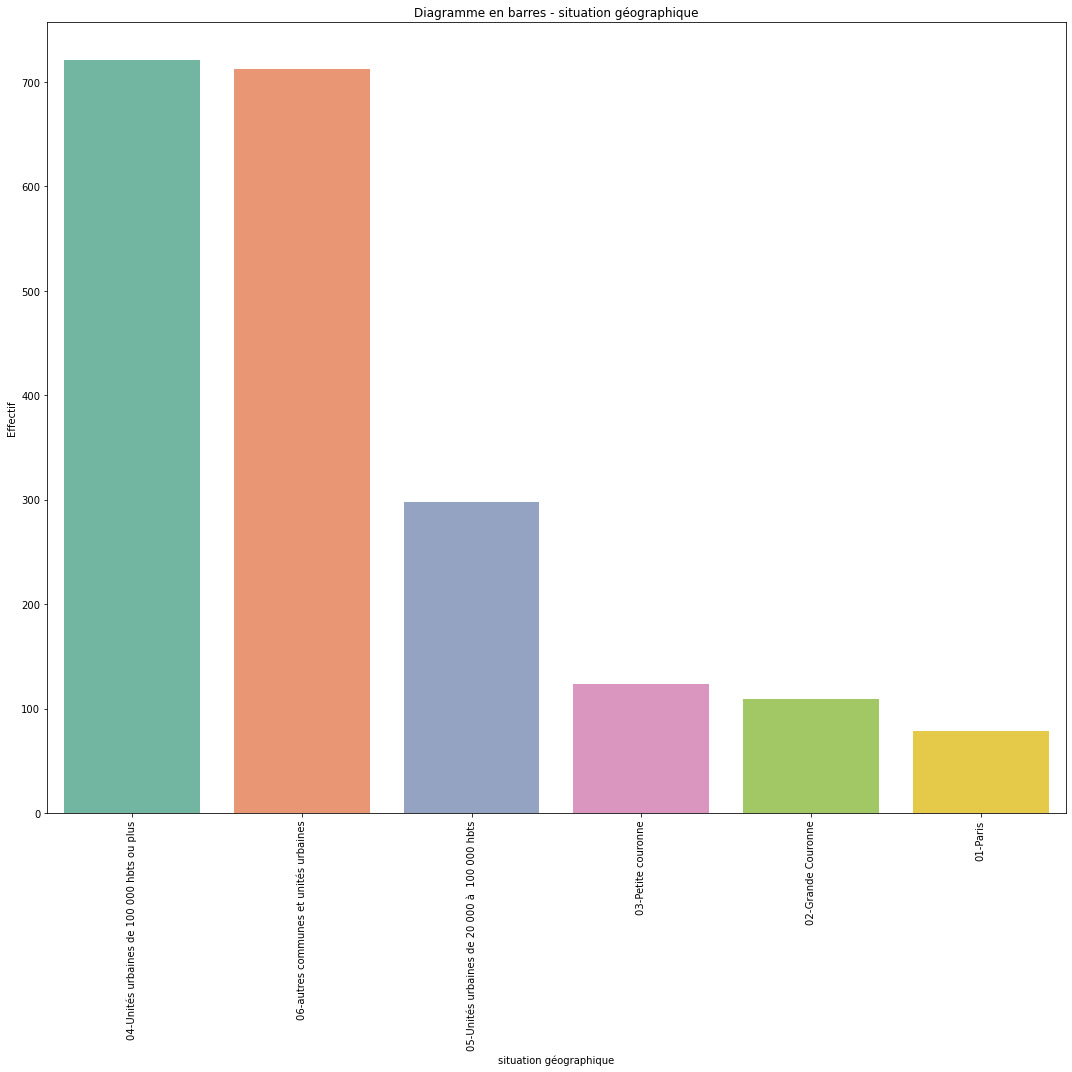

###################################################################### 

########################## Analyse de tranche d'entrées ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                           Effectif  Fréquence (%)
De 2 à  5 000 entrées           444          21.75
De 5 à  10 000 entrées          421          20.63
De 10 à  20 000 entrées         319          15.63
Moins de 2000 entrées           235          11.51
De 50 à  80 000 entrées         132           6.47
De 20 à  30 000 entrées         129           6.32
De 100 à  150 000 entrées        79           3.87
De 30 à  40 000 entrées          73           3.58
De 40 à  50 000 entrées          55           2.69
De 150 à  200 000 entrées        54           2.65
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: De 2 à  5 000 entrées


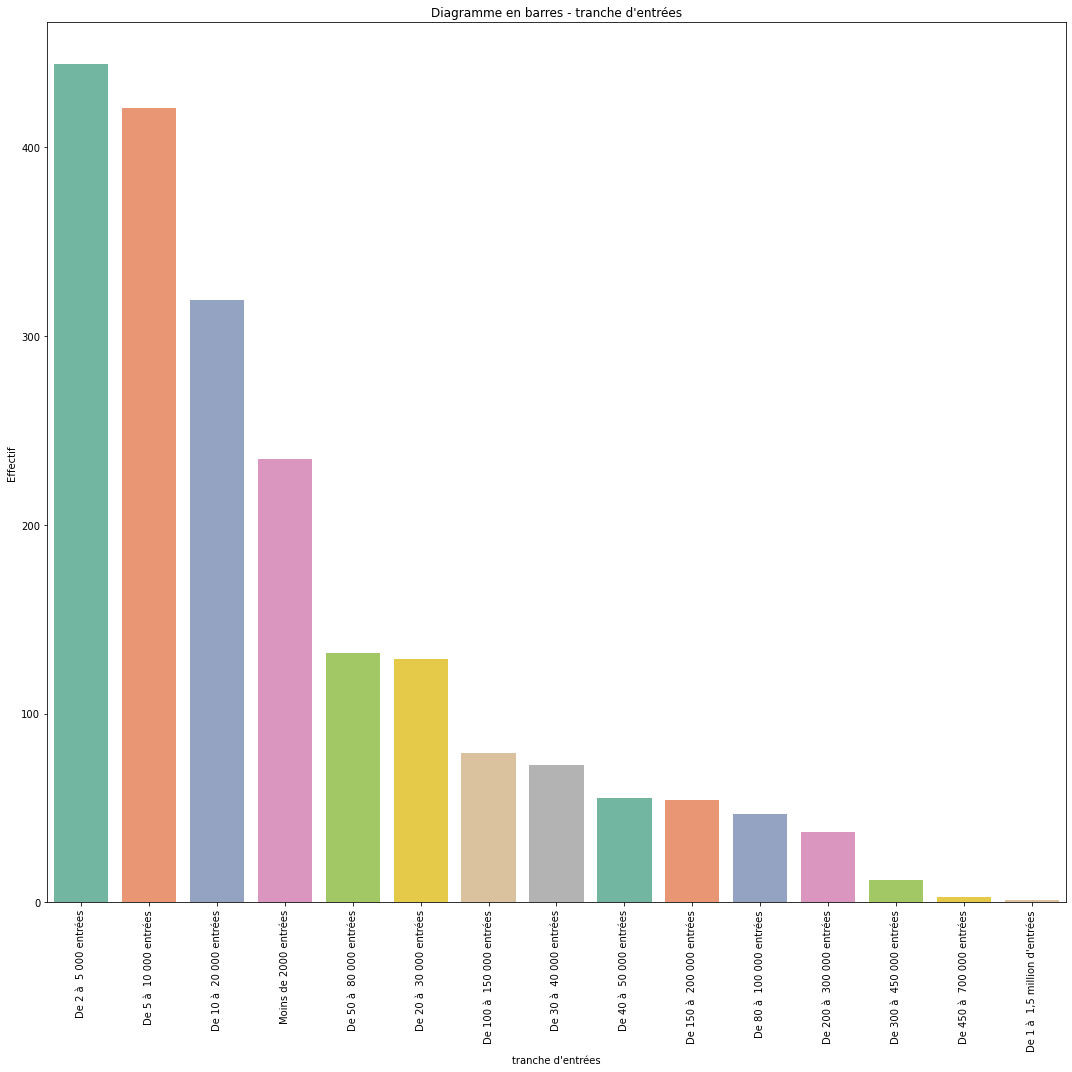

###################################################################### 

########################## Analyse de propriétaire ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                                                    Effectif  Fréquence (%)
GAUMONT                                                   22           1.08
UGC SAS                                                   18           0.88
UGC CINE CITE                                             15           0.73
ARTS ET TECHNIQUES                                        13           0.64
ASSOCIATION CINEFOL 31                                    13           0.64
CINE-OFF                                                  13           0.64
ASSOCIATION LE PARVIS SCENE NATIONALE TARBES PY...        12           0.59
UNION REG FEDERATIONS OEUVRES LAIQUES AUVERGNE ...        11           0.54
LE CINEMA DU SOLEIL                               

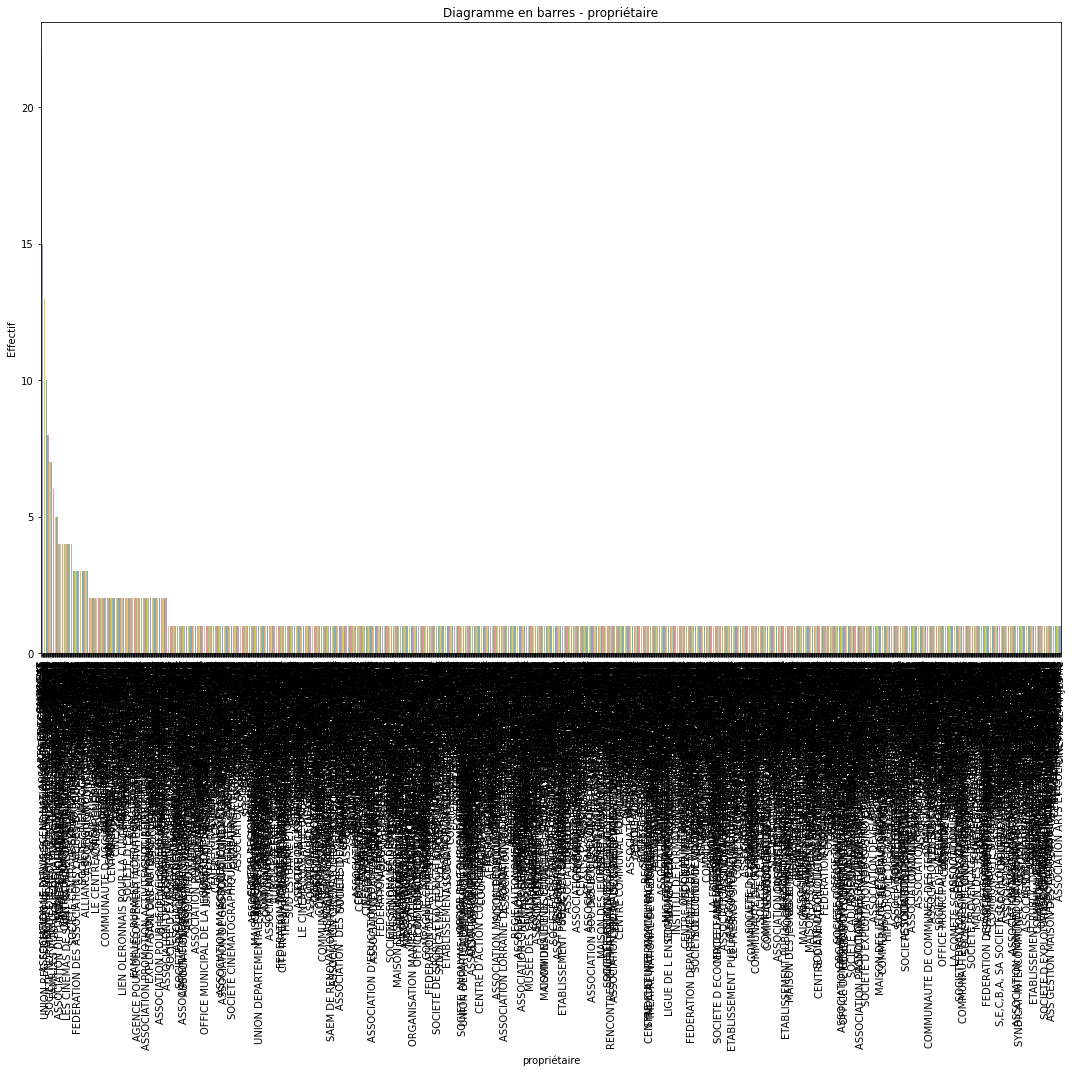

###################################################################### 

########################## Analyse de programmateur ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                                             Effectif  Fréquence (%)
SARL MULTICINES PYRENNEENS (Xavier-Menou)         856          41.94
SNC SAGEC - CINE 32 VEO                           252          12.35
SAS CINE DIFFUSION                                116           5.68
SARL MC4 DISTRIBUTION                             108           5.29
SARL GPCI                                         100           4.90
LES CINEMAS GAUMONT PATHE                          93           4.56
SARL LES FILMS DE LA ROCHELLE                      70           3.43
UGC DIFFUSION                                      60           2.94
SARL CINEODE                                       50           2.45
SARL MICROMEGAS DIFFUSION CINEMATOGRAPHIQUE

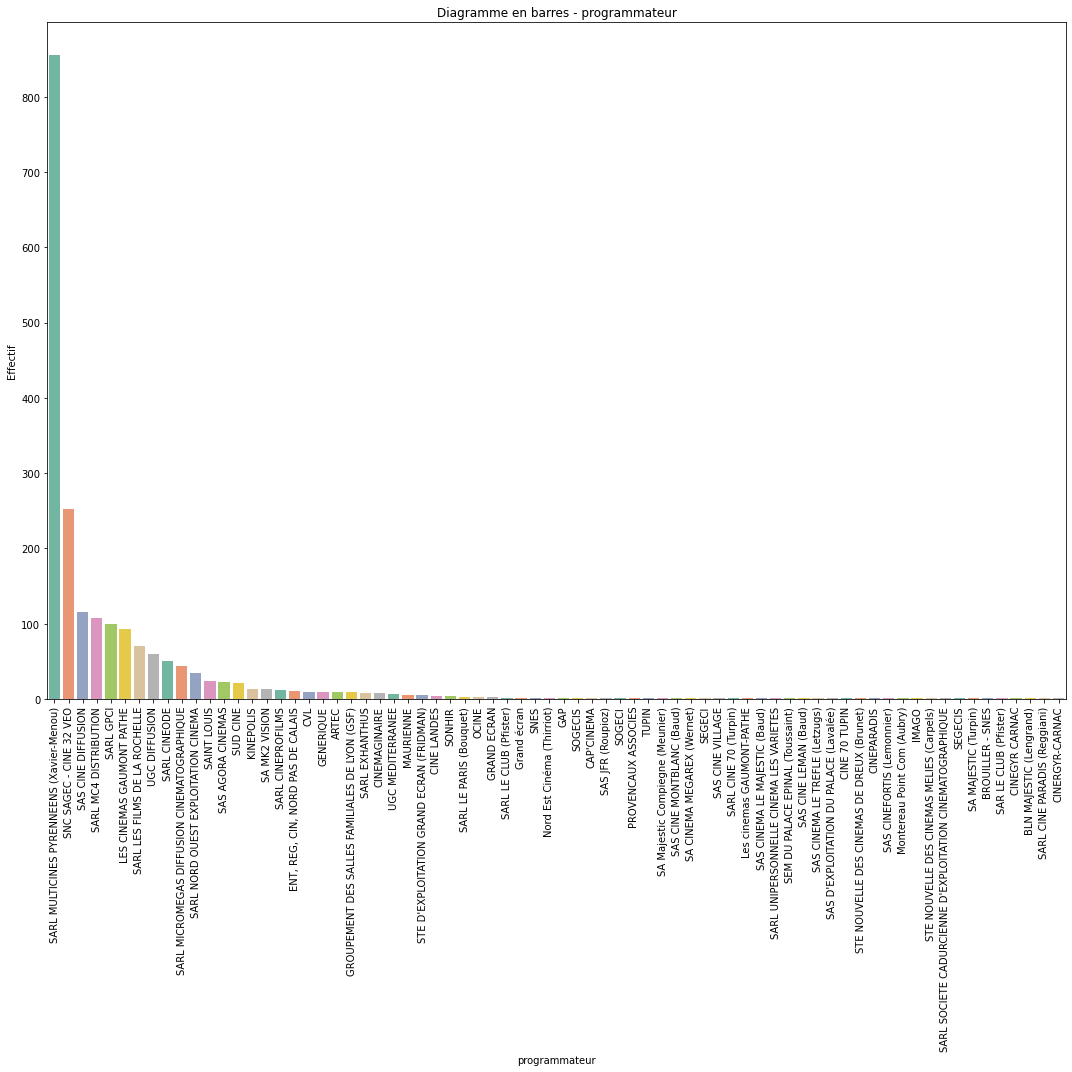

###################################################################### 

########################## Analyse de AE ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
     Effectif  Fréquence (%)
OUI      1237          60.61
NON       804          39.39
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: OUI


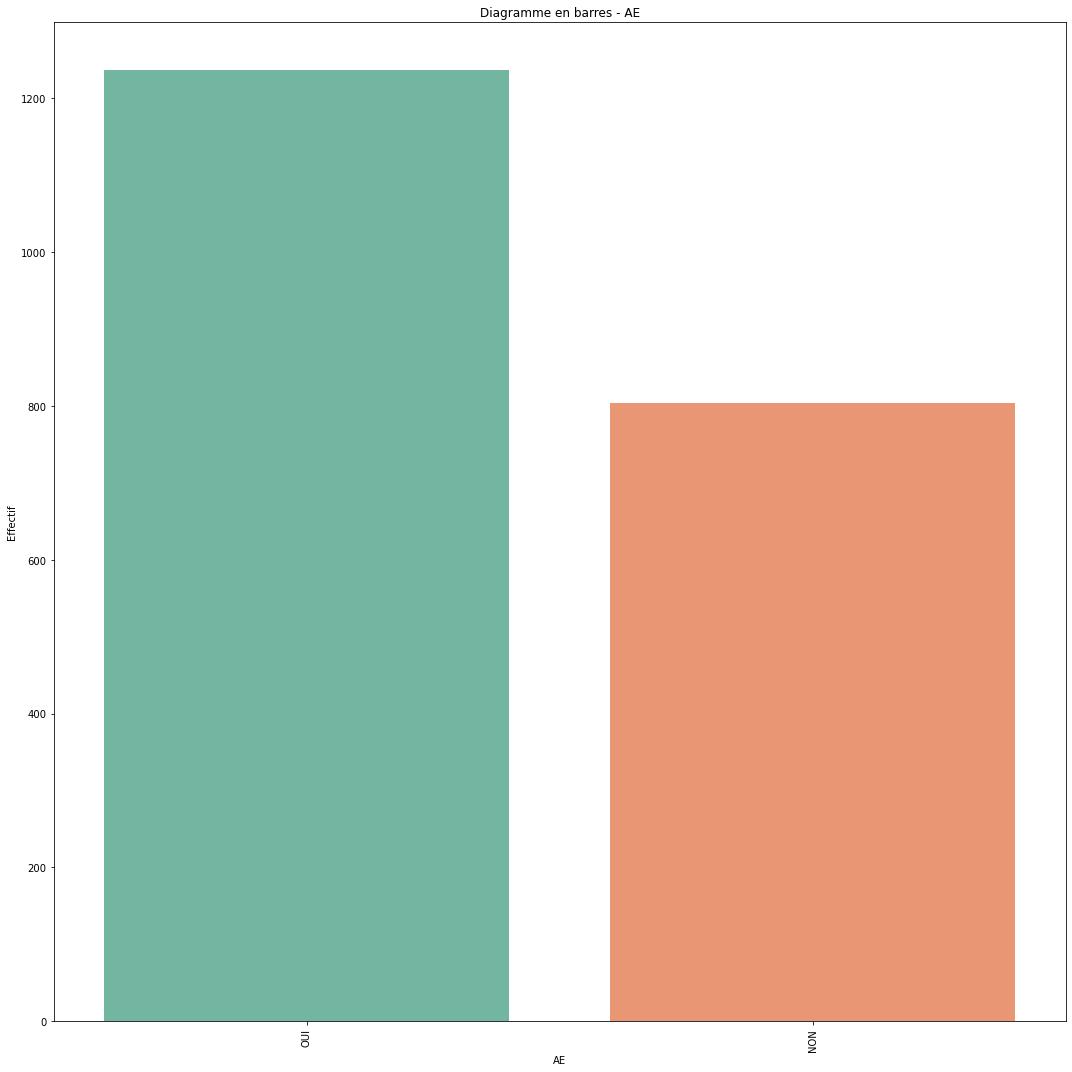

###################################################################### 

########################## Analyse de catégorie Art et Essai ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
     Effectif  Fréquence (%)
NON       804          39.39
E         662          32.44
C         250          12.25
D         206          10.09
A          94           4.61
B          25           1.22
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: NON


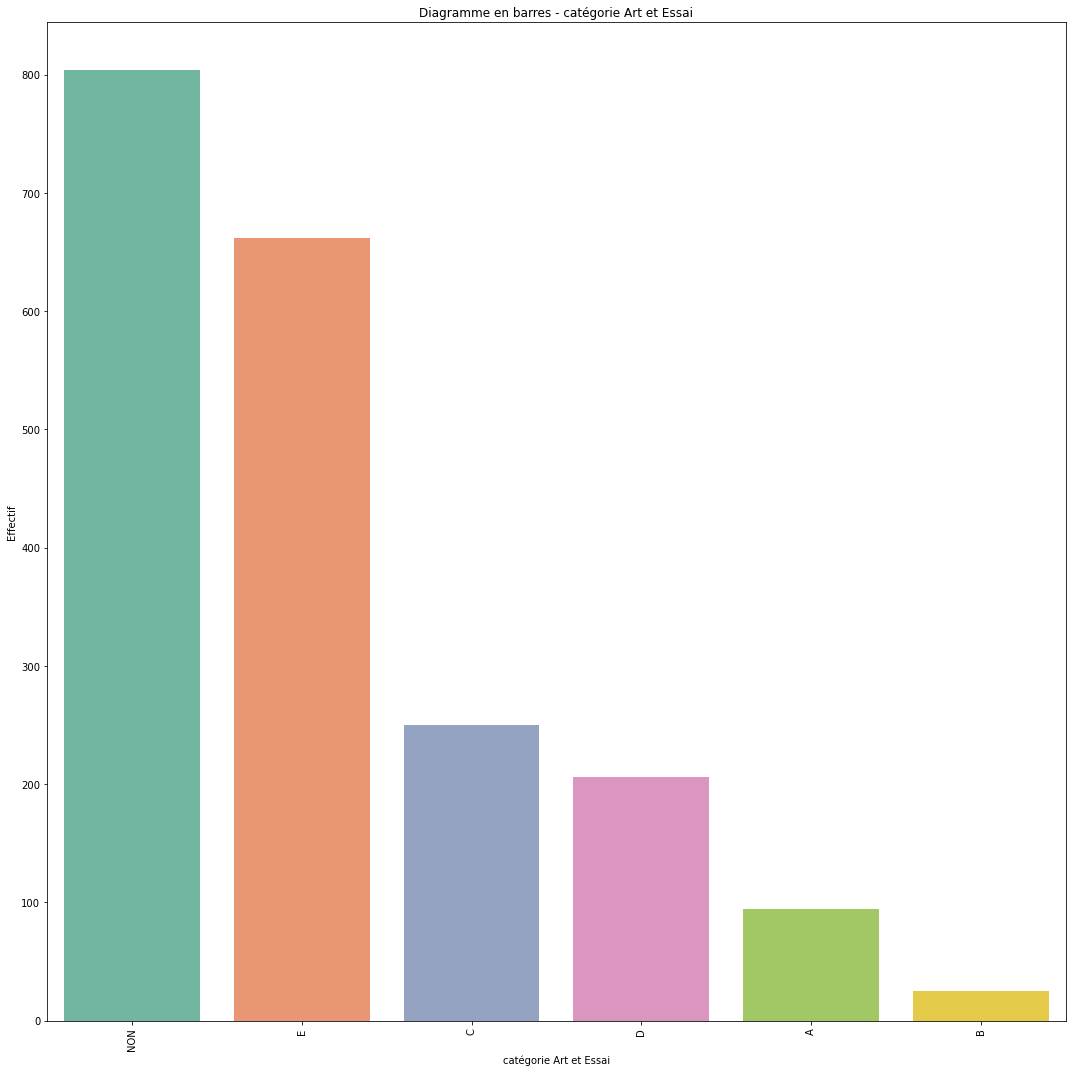

###################################################################### 

########################## Analyse de genre ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
           Effectif  Fréquence (%)
FIXE           1934          94.76
ITINERANT       107           5.24
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: FIXE


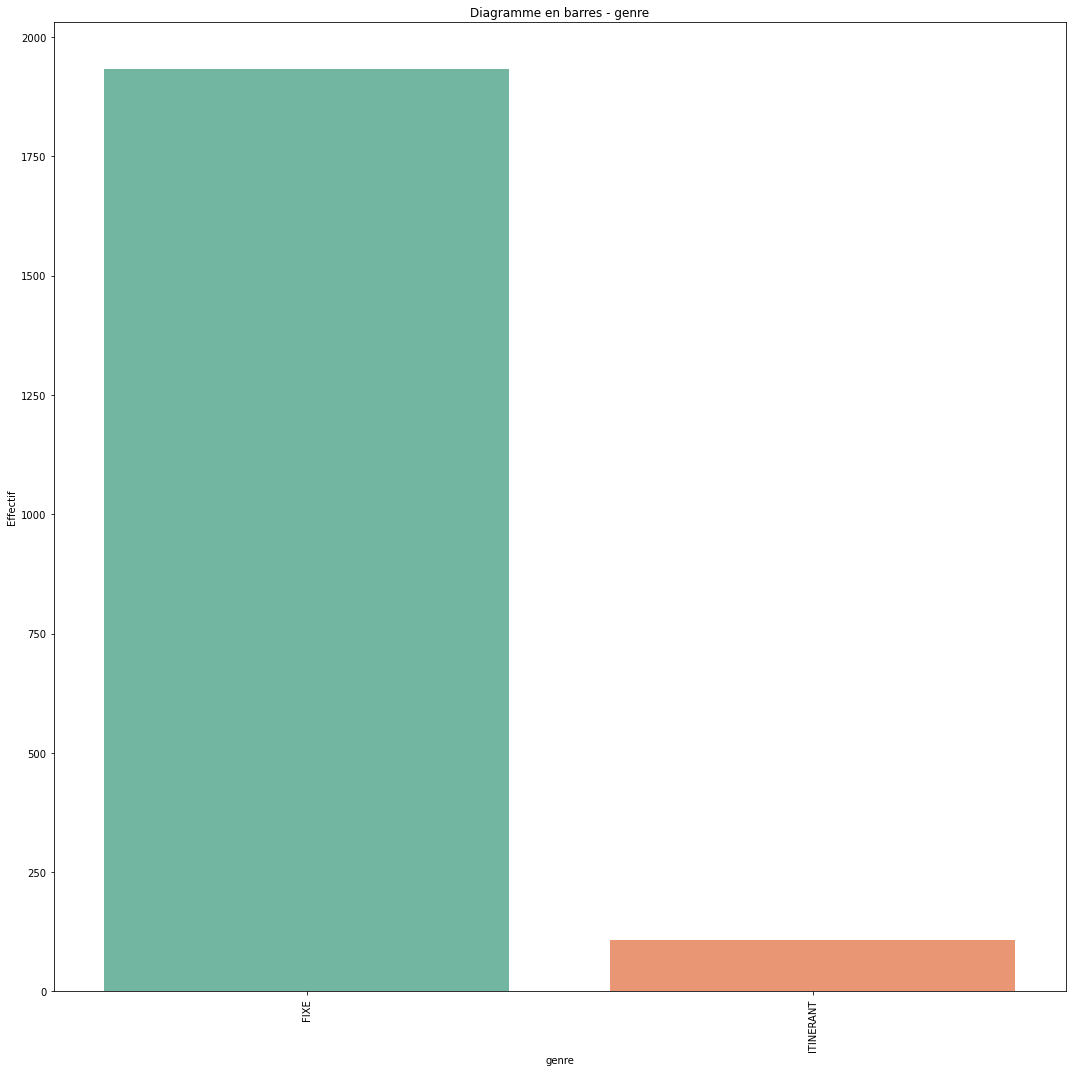

###################################################################### 

########################## Analyse de multiplexe ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
     Effectif  Fréquence (%)
NON      1808          88.58
OUI       233          11.42
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: NON


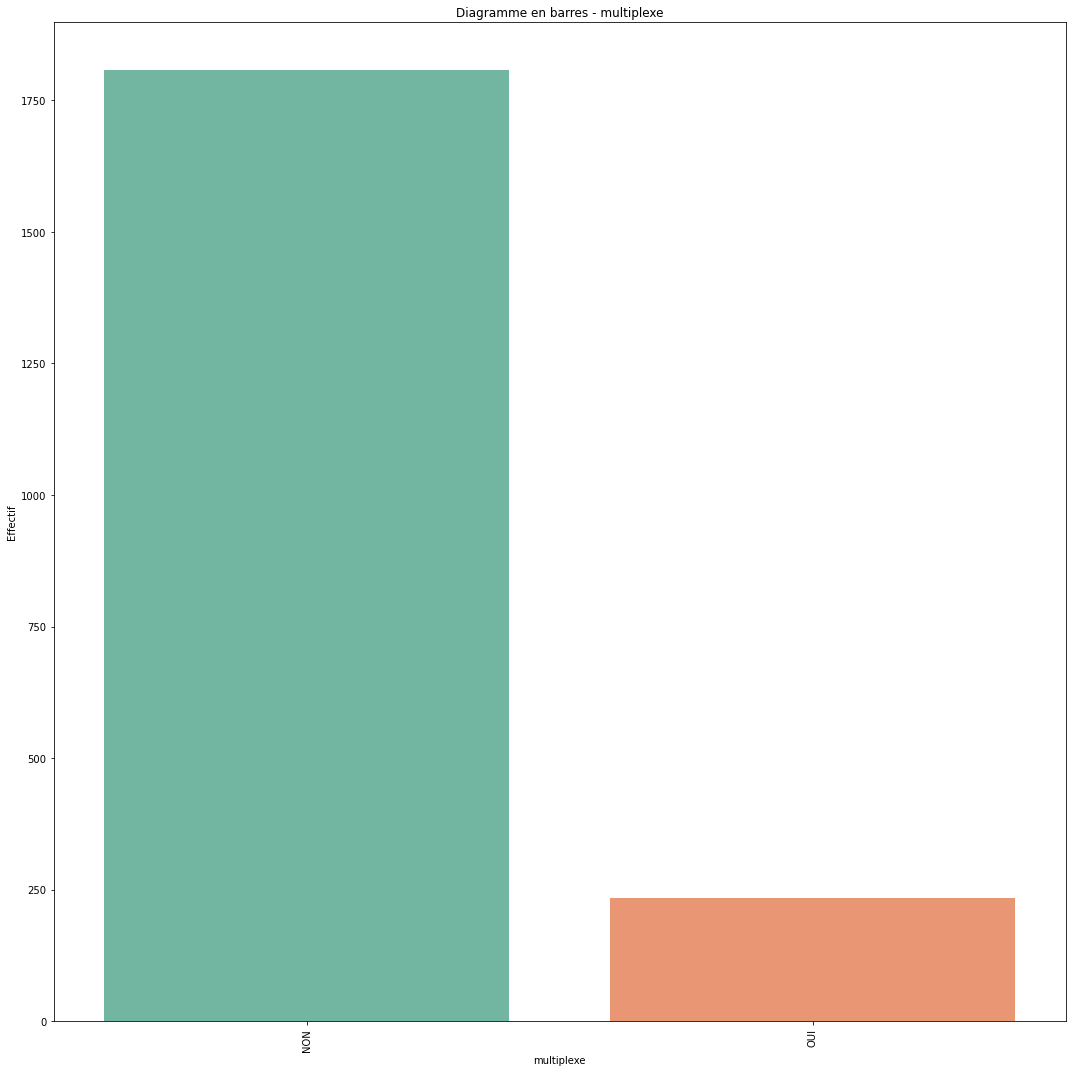

###################################################################### 

########################## Analyse de zone de la commune ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
   Effectif  Fréquence (%)
C       903          44.24
B       551          27.00
I       327          16.02
R       260          12.74
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: C


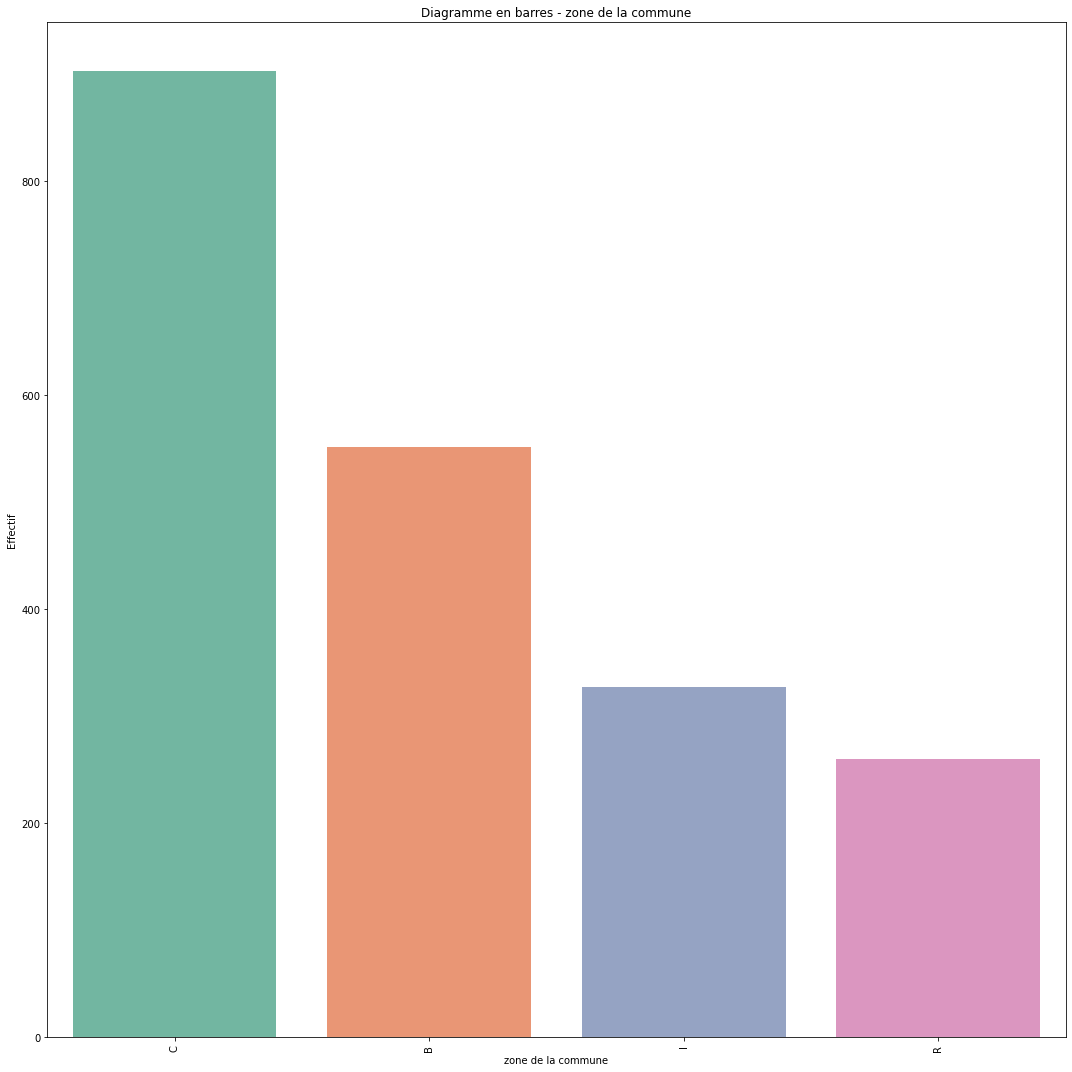

###################################################################### 

########################## Analyse de latitude ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
           Effectif  Fréquence (%)
48,871363         2           0.10
45,323346         2           0.10
41,915976         2           0.10
43,552366         2           0.10
51,033536         2           0.10
44,900658         2           0.10
48,847502         2           0.10
43,923796         2           0.10
47,794318         1           0.05
43,250817         1           0.05
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: 48,871363


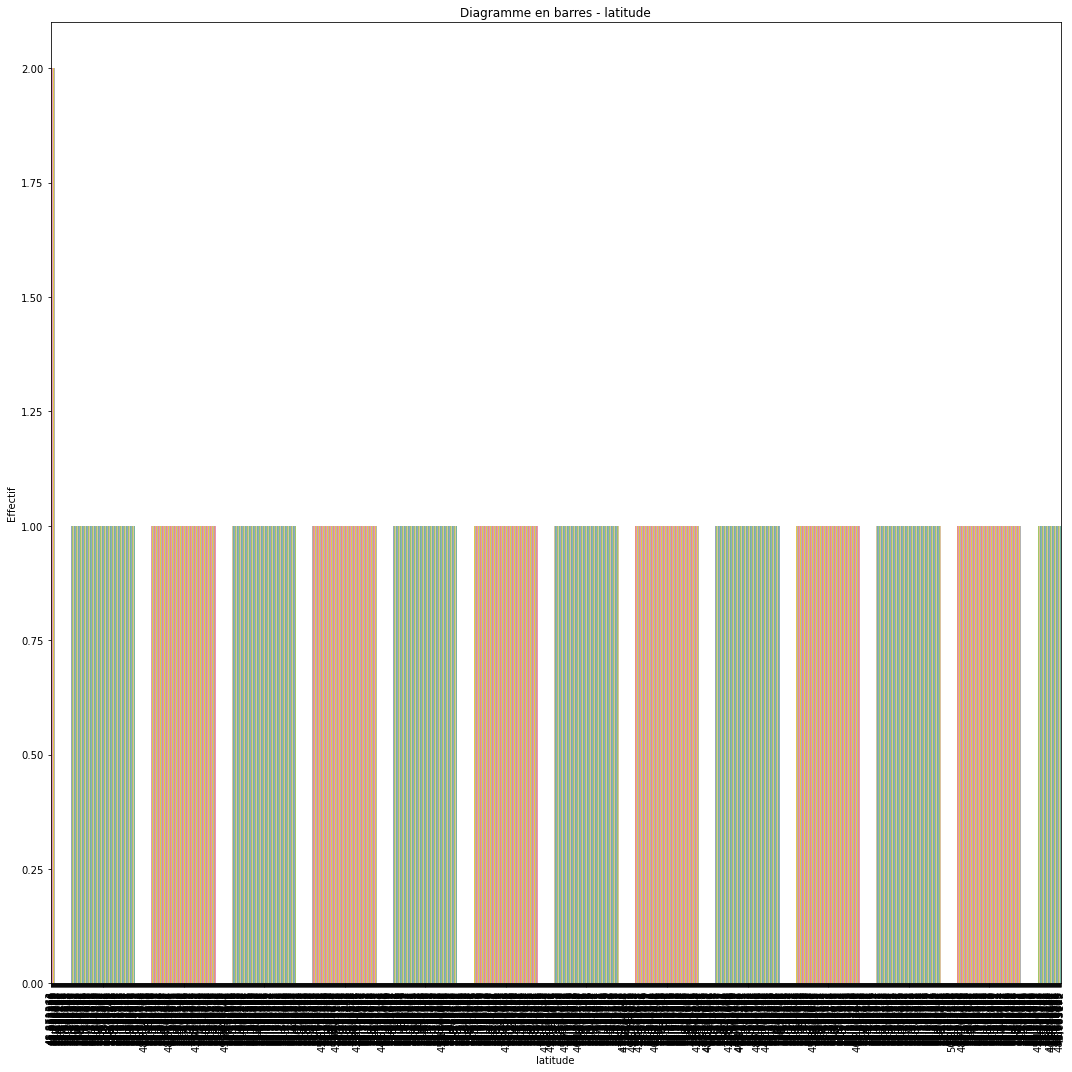

###################################################################### 

########################## Analyse de longitude ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
           Effectif  Fréquence (%)
2,342788          2           0.10
2,144604          2           0.10
7,016598          2           0.10
6,538468          2           0.10
8,731036          2           0.10
2,372294          2           0.10
4,832347          1           0.05
2,388787          1           0.05
2,511848          1           0.05
-1,610628         1           0.05
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: 2,342788


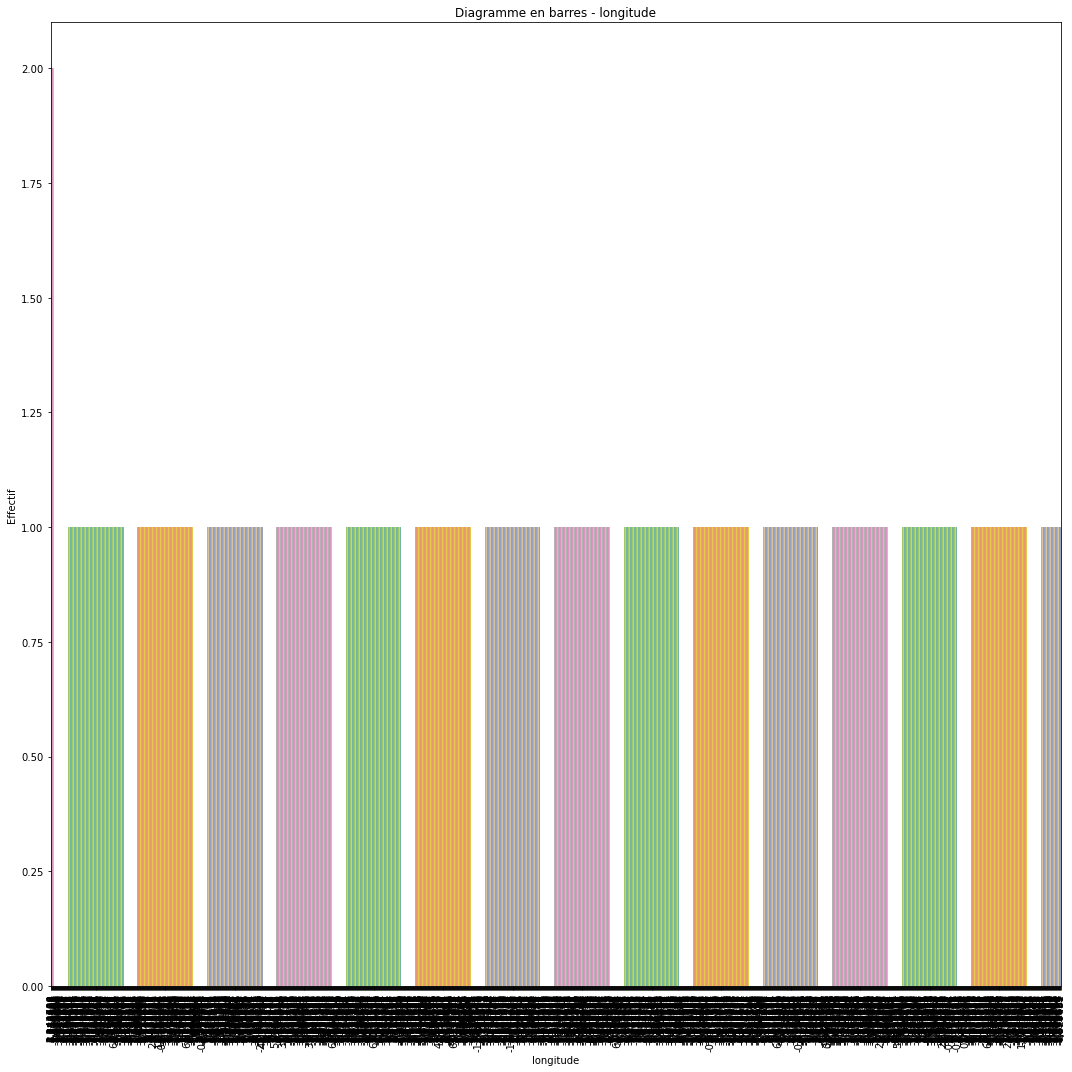

###################################################################### 

########################## Analyse de geolocalisation ##########################
-------------------------------------
TOP 10 des effectifs et des fréquences
-------------------------------------
                     Effectif  Fréquence (%)
43,552366,7,016598          2           0.10
45,323346,6,538468          2           0.10
43,923796,2,144604          2           0.10
41,915976,8,731036          2           0.10
51,033536,2,372294          2           0.10
48,923862,2,250041          1           0.05
47,630162,-1,8325           1           0.05
47,891029,-1,991909         1           0.05
45,747157,-0,634183         1           0.05
43,664191,-1,395            1           0.05
-------------------------------------
Mode de la variable
-------------------------------------
Valeur la plus présentes dans la série: 43,552366,7,016598


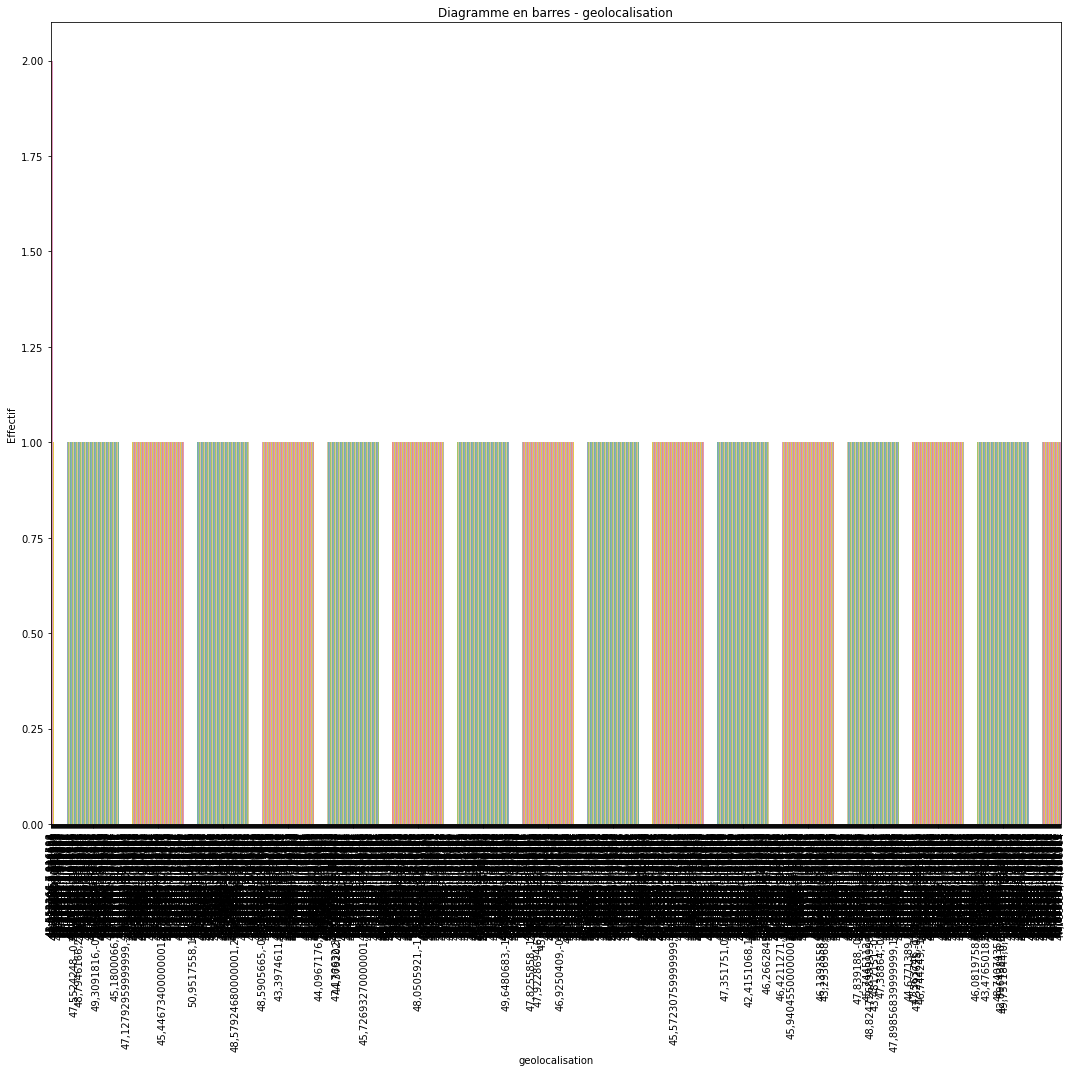

###################################################################### 



In [20]:
for quali in var_quali:
    v_qual=data[quali]
    analyse_quali(v_qual,quali)

#### Analyse bivariée

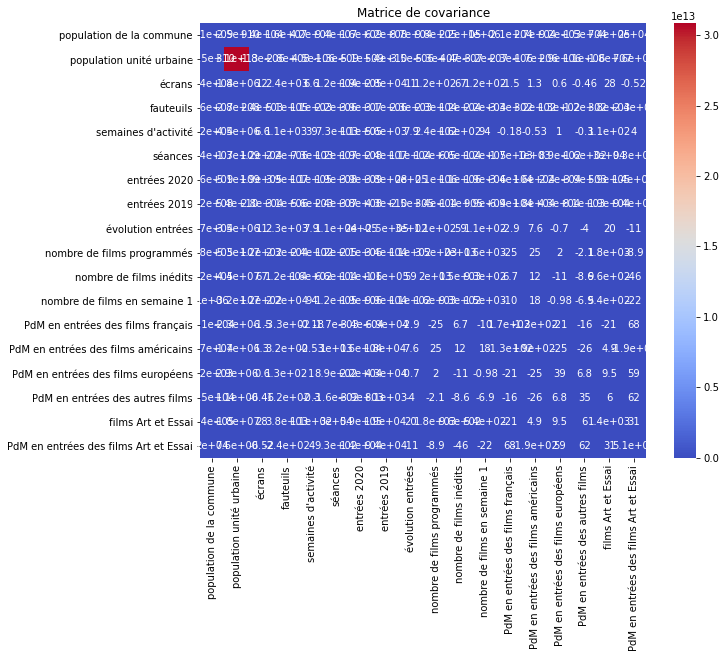

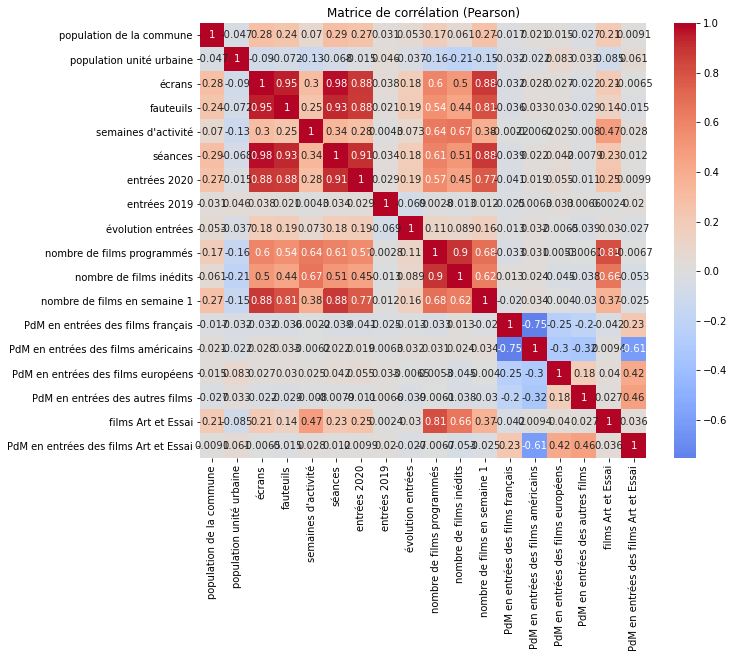

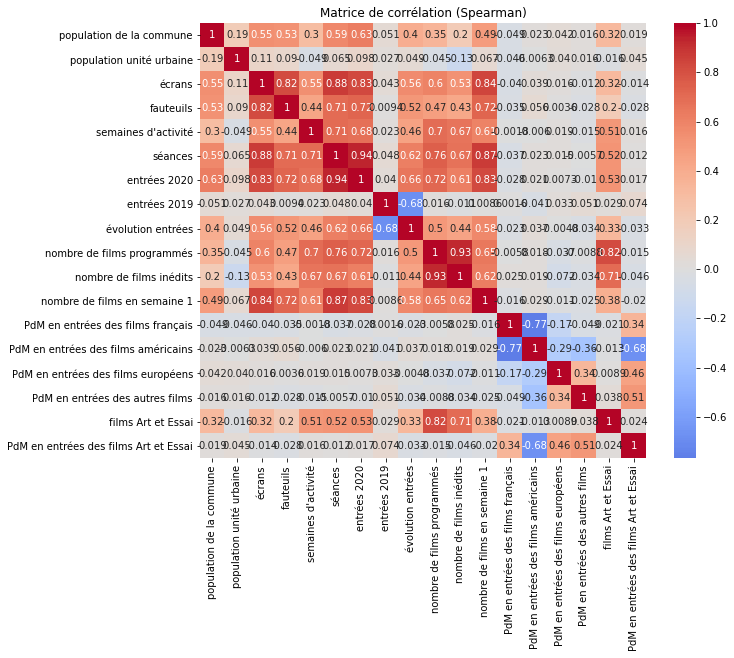

In [21]:
#Variables Quantitatives

num_cols = data.select_dtypes(include=np.number).columns
df_num = data[num_cols].dropna()

# --- Matrice de covariance ---
cov_matrix = df_num.cov()
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de covariance")
plt.show()

# --- Matrice de corrélation Pearson ---
corr_pearson = df_num.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation (Pearson)")
plt.show()

# --- Matrice de corrélation Spearman ---
corr_spearman = df_num.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation (Spearman)")
plt.show()



On constate de fortes corrélations dans cette matrice, à savoir entre les variables suivantes :
Ecrans et fauteuils, écrans et séances, écrans et entrées, écrans et le nombre de films en semaine 1 (respectivement 0.95, 0.98, 0.88, 0.88).
Séanes et fauteuils, séances et entrées, séances et nombre de films en semaine 1 (respectivement 0.93, 0.91, 0.88).
Entrées et fauteuils (0.88).
Nombre de films inédits et nombre de films programmés (0.9).
Qui sont toutes > 0.85

C'est à dire que si une des variables augmente l'autre augmente aussi, et vice-versa.
Si une des variable diminue, l'autre diminue aussi.
Ces variables sont donc l'une dépendante de l'autre.

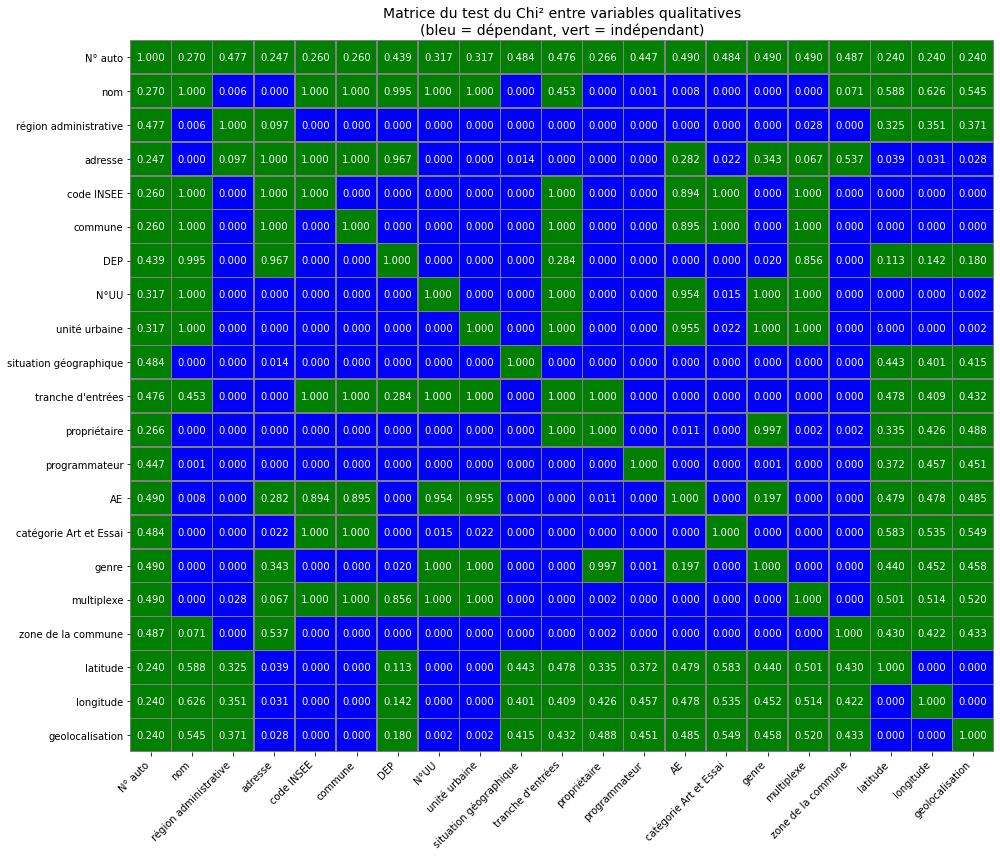

In [22]:
# Sélection des colonnes qualitatives
cat_cols = data.select_dtypes(include=['object', 'category']).columns
df_cat = data[cat_cols].dropna()

# Initialisation des matrices
pval_matrix = pd.DataFrame(np.ones((len(cat_cols), len(cat_cols))), index=cat_cols, columns=cat_cols)
binary_matrix = pd.DataFrame(np.ones((len(cat_cols), len(cat_cols))), index=cat_cols, columns=cat_cols)

# Remplissage des matrices
for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols):
        if i >= j:
            continue
        contingency_table = pd.crosstab(df_cat[col1], df_cat[col2])
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            try:
                chi2, p, dof, ex = chi2_contingency(contingency_table)
                pval_matrix.loc[col1, col2] = p
                pval_matrix.loc[col2, col1] = p
                binary_matrix.loc[col1, col2] = 0 if p < 0.05 else 1
                binary_matrix.loc[col2, col1] = 0 if p < 0.05 else 1
            except:
                pval_matrix.loc[col1, col2] = np.nan
                pval_matrix.loc[col2, col1] = np.nan
                binary_matrix.loc[col1, col2] = np.nan
                binary_matrix.loc[col2, col1] = np.nan

# Palette binaire : 0 = bleu (dépendance), 1 = vert (indépendance)
cmap = sns.color_palette(["blue", "green"])

# Tracé de la heatmap avec p-values comme annotations
plt.figure(figsize=(14, 12))
sns.heatmap(binary_matrix, annot=pval_matrix.round(3), fmt=".3f", cmap=cmap,
            linewidths=0.5, linecolor='grey', cbar=False)
plt.title("Matrice du test du Chi² entre variables qualitatives\n(bleu = dépendant, vert = indépendant)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Pour cette matrice nous nous sommes décidés à mettre 2 couleurs pour préciser si les variables sont dépendentes ou pas les unes des autres.
Pour chaque croisement entre 2 variables où la couleur est verte, cela veut dire que les variables ne sont pas dépendentes l'une de l'autre. Contrairement à la couleur bleue où cela veut dire qu'il y a une association significative entre les variables et qu'elles sont donc dépendentes l'une de l'autre.

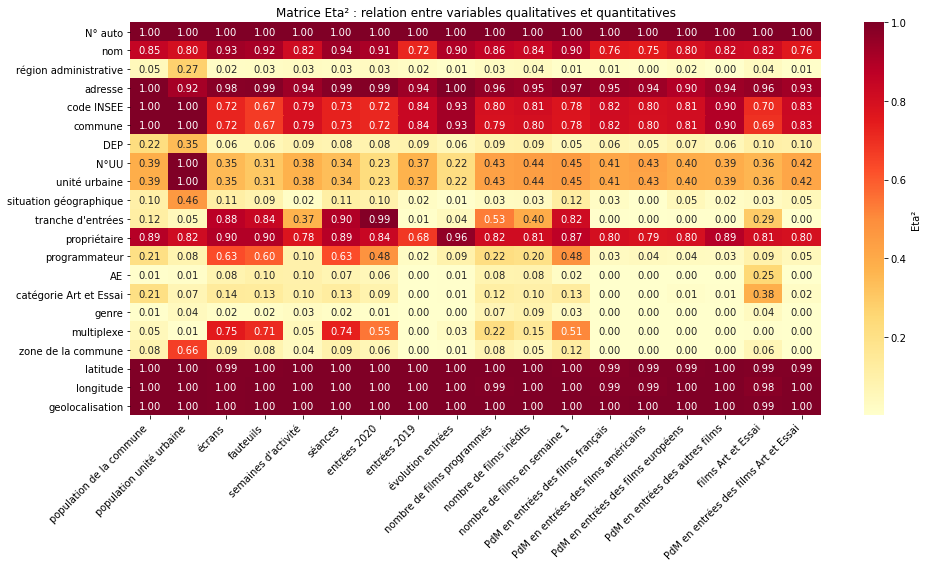

In [23]:
def eta_squared(y, classes):
    """
    Calcule l'eta² (variance expliquée) entre une variable quantitative (y)
    et une variable qualitative (classes).
    """
    classes_unique = np.unique(classes)
    y_mean = np.mean(y)
    ss_total = np.sum((y - y_mean) ** 2)

    ss_between = sum([
        len(y[classes == group]) * (np.mean(y[classes == group]) - y_mean) ** 2
        for group in classes_unique
    ])

    return ss_between / ss_total if ss_total != 0 else np.nan

def eta_squared_matrix(data, qualitatifs, quantitatifs):
    matrix = pd.DataFrame(index=qualitatifs, columns=quantitatifs)

    for qual in qualitatifs:
        for quant in quantitatifs:
            try:
                eta2 = eta_squared(data[quant].values, data[qual].values)
                matrix.loc[qual, quant] = eta2
            except Exception as e:
                print(f"Erreur pour {qual} vs {quant} : {e}")
                matrix.loc[qual, quant] = np.nan

    return matrix.astype(float)

# Prétraitement : garder uniquement les lignes sans NA
data_clean = data.dropna(subset=cat_cols.union(num_cols))

# Variables
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns

quantitatives = num_cols.tolist()
qualitatives = cat_cols.tolist()

# Calcul matrice Eta²
eta2_mat = eta_squared_matrix(data_clean, qualitatifs=qualitatives, quantitatifs=quantitatives)

# Visualisation
plt.figure(figsize=(14, 8))
sns.heatmap(eta2_mat, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Eta²'})
plt.title("Matrice Eta² : relation entre variables qualitatives et quantitatives")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


La grande majorité des variables quantitaives sont expliquées par la variable qualitatives qu'est l'adresse. A savoir que la valeur est &ge; 0.90.
Les autres variables qualitatives qui expliquent à peu près la plupart des variables quantitatives sont le code INSEE, la commune et le propriétaire ainsi que le nom. Le code INSEE et la commune partagent à peu près les mêmes valeurs l'une avec l'autre et donc explique les variables quantitatives au même degré.
Les valeurs sont supérieures à 0.70 pour la plupart, sauf pour quelques exceptions.

Tant que les valeurs sont supérieures les liens entre la variable qualitative et la variable quantitative sont forts.

### Préparation à la modélisation

#### Encodage des variables

#### Sélection des variables

Nous cherchons à prédire le nombre d'entrée en 2020. Nous allons donc mettre à l'écart cette variable.

In [24]:
X = data.drop(columns='entrées 2020')
y = data['entrées 2020']

Pour réaliser notre modèle, nos variables caractéristiques X doivent répondre à deux conditions: 
- Avoir un lien linéaire avec notre variables
- Ne pas avoir de lien entre elles

Pour les variables quantitatives, nous allons sélectionné nos variables à l'aide de l'indicateur VIF qui va assurer qu'il n'y a pas de multicolinéarité entre nos variables caractéristique. Cette algorithmes va calculer l'indicateur VIF de toutes les variables, supprimer la variable avec le VIF maximal et recommencer jusqu'à ce que toutes nos variables est un VIF inféreur à 5.

In [25]:
max_vif=100000000
# Sélection des variables quantitatives
num_cols = X.select_dtypes(include=np.number).columns
df_num = X[num_cols].dropna()
while max_vif>5:
    # Calcul du VIF pour chaque variable
    vif_data = pd.DataFrame()
    vif_data['variable'] = df_num.columns
    vif_data['VIF'] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]
    max_vif=vif_data['VIF'].max()
    idx_max=vif_data[vif_data['VIF']==max_vif]['variable']
    df_num=df_num.drop(columns=idx_max)

print(vif_data)

                              variable       VIF
0             population de la commune  1.282073
1             population unité urbaine  1.434174
2                            fauteuils  1.798649
3                         entrées 2019  1.263793
4                    évolution entrées  1.055408
5    PdM en entrées des films français  4.970183
6  PdM en entrées des films américains  3.533208
7   PdM en entrées des films européens  2.681763
8      PdM en entrées des autres films  1.718227
9                   films Art et Essai  3.258655


Du côté des variables qualitatives, nous allons rajouter les variables suivantes : 
- Nom
- tranche d'entrées
- propriétaire
- commune

Nous séléctionnons ces variables car elles possédent un fort coefficient de corrélation avec notre variables cibles entrées 2020.

**Remarque :** Nous avons décidé de ne pas prendre en compte la variable adresse, qui a pourtant une forte corréaltion, pour éviter les risques de surapprentissage.

On peut donc faire une régression linéaire vu que les variables sont indépendantes l'une de l'autre mais sont dépendantes de la variable cible.

Les variables choisies sont les suivantes :

*   population de la commune
*   fauteuils
*   entrées 2019
*   évolution entrées
*   PdM en entrées des films français
*   PdM en entrées des films américains
*   PdM en entrées des films européens
*   PdM en entrées des autres films
*   films Art et Essai
*   Nom
*   tranche d'entrées
*   propriétaire



**Remarque:** Nous avons exclus les variables population unité urbaine et commune car ces deux variables possédent une lien fort fort avec la variables communes. Cela nous permet de respecter notre condition de multicolinéarité.

Nous allons maintenant préparer nos données à la modélisation. C'est à dire que nous allons créer un sous jeu de données avec les variables sélectionnées, encoder nos variables qualitative et transformer les variables pour lesquels nous avons détecté qu'une transformation était nécessaire. Ces transformations sont importante car le modèle de régression linéaire qui nous souhaitons utilisé est très sensible aux valeurs extrêmes.

########################## Analyse de population de la commune ##########################


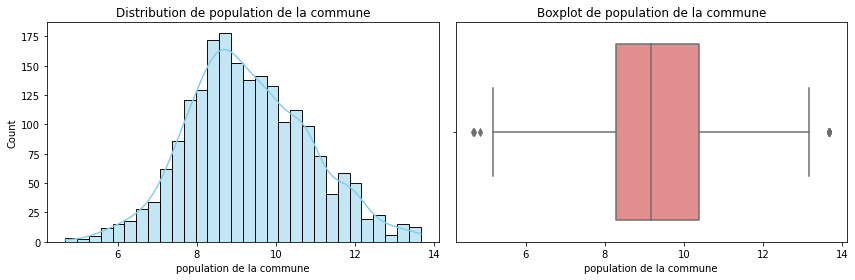

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  4.672828834461906
La valeur maximum est  :  13.666588186681247
La moyenne de cette variable est :  9.312403559146656
Ecart-type :  1.5473800818743038 . 
 C'est à dire que les valeurs sont écarté d'environ 1.5473800818743038 autour de la moyenne
Q1  8.26796230533871 
 C'est à dire que 25% des valeurs sont inférieur à 8.26796230533871.
Q2 :  9.174920426744922 
 C'est à dire que 50% des valeurs sont inférieur à 9.174920426744922.
Q3:  10.36753598474319 
 C'est à dire que 75% des valeurs sont inférieur à 10.36753598474319.
Ecart interquartile : 2.0995736794044806 
 C'est à dire que 50% des valeurs sont comprise entre 8.26796230533871 et 10.36753598474319.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  5.834810737062605
5%  6.955592608396297
95%  11.986983364544004
99%  13.148568991172409

------------------------

<ipython-input-27-d8d1116d42d0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=np.log1p(X[col])


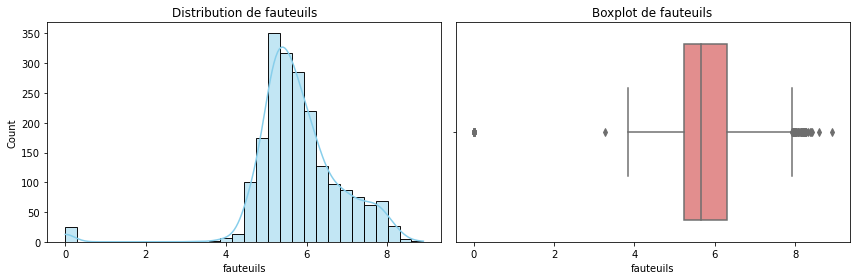

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  8.903679332926599
La moyenne de cette variable est :  5.7980371944209095
Ecart-type :  1.0913809700944102 . 
 C'est à dire que les valeurs sont écarté d'environ 1.0913809700944102 autour de la moyenne
Q1  5.236441962829949 
 C'est à dire que 25% des valeurs sont inférieur à 5.236441962829949.
Q2 :  5.666426688112432 
 C'est à dire que 50% des valeurs sont inférieur à 5.666426688112432.
Q3:  6.309918278226516 
 C'est à dire que 75% des valeurs sont inférieur à 6.309918278226516.
Ecart interquartile : 1.073476315396567 
 C'est à dire que 50% des valeurs sont comprise entre 5.236441962829949 et 6.309918278226516.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  4.61512051684126
95%  7.696667081526462
99%  8.18299749865952

-------------------------------------
ASYMETRIE
------

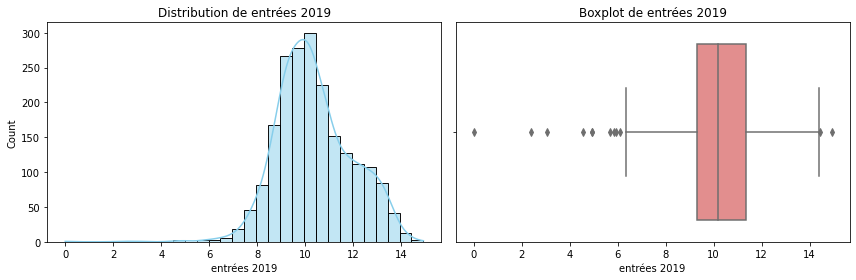

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  14.918318698388696
La moyenne de cette variable est :  10.361993454405114
Ecart-type :  1.5582299804599549 . 
 C'est à dire que les valeurs sont écarté d'environ 1.5582299804599549 autour de la moyenne
Q1  9.308555419473137 
 C'est à dire que 25% des valeurs sont inférieur à 9.308555419473137.
Q2 :  10.181687309598416 
 C'est à dire que 50% des valeurs sont inférieur à 10.181687309598416.
Q3:  11.355522836618695 
 C'est à dire que 75% des valeurs sont inférieur à 11.355522836618695.
Ecart interquartile : 2.0469674171455576 
 C'est à dire que 50% des valeurs sont comprise entre 9.308555419473137 et 11.355522836618695.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  7.047299470924711
5%  8.14002395246292
95%  13.170970667710497
99%  13.72675815336737

-------------------------------

<ipython-input-27-d8d1116d42d0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=np.log1p(X[col])


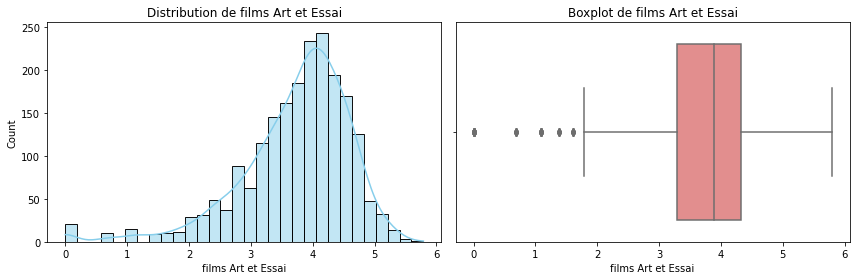

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  5.7899601708972535
La moyenne de cette variable est :  3.7260303137569397
Ecart-type :  0.8881339975835074 . 
 C'est à dire que les valeurs sont écarté d'environ 0.8881339975835074 autour de la moyenne
Q1  3.295836866004329 
 C'est à dire que 25% des valeurs sont inférieur à 3.295836866004329.
Q2 :  3.8918202981106265 
 C'est à dire que 50% des valeurs sont inférieur à 3.8918202981106265.
Q3:  4.31748811353631 
 C'est à dire que 75% des valeurs sont inférieur à 4.31748811353631.
Ecart interquartile : 1.021651247531981 
 C'est à dire que 50% des valeurs sont comprise entre 3.295836866004329 et 4.31748811353631.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.2772588722239796
5%  2.0794415416798357
95%  4.812184355372417
99%  5.186234003563656

------------------------------------

In [27]:
X = data[['population de la commune', 'fauteuils', 'entrées 2019', 'évolution entrées',
          'PdM en entrées des films français', 'PdM en entrées des films américains',
          'PdM en entrées des films européens', 'PdM en entrées des autres films',
          'films Art et Essai', 'nom', 'tranche d\'entrées', 'propriétaire']]


#Transformation des variables quantitatives
var_encore_a_transfo=[]
cat_cols = X.select_dtypes(include=['int64']).columns
for col in cat_cols:
    if col in var_tranfo:
        v_transfo=np.log1p(X[col])
        var_encore_a_transfo=analyse_quanti(v_transfo,col, var_encore_a_transfo)
        if col not in var_encore_a_transfo:
            X[col]=np.log1p(X[col])

print("Variables restantes à traitées")
for i in var_encore_a_transfo:
    print(i)

Pour transformer nos variables, nous avons essayer d'appliquer une transformation logarithmes avec la fonction np.Log1p. Nous remarquons que cette fonction est efficace sur certaines de nos variables comme sur "population commune". Avec cette transformation, la distrubution de cette variable est plus symétrique est contient moins de valeur abérantes (ici 16 contre 247 avant transformation). 

Cependant, nous observons aussi que les variables fauteuils et films Art et Essai, ont encore une asymétrie trop importante à gauche. Nous allons donc essayer une transformation qui passera les valeurs transformés au carré. Nous allons donc appliqué le carré du logarithmes.

########################## Analyse de fauteuils ##########################


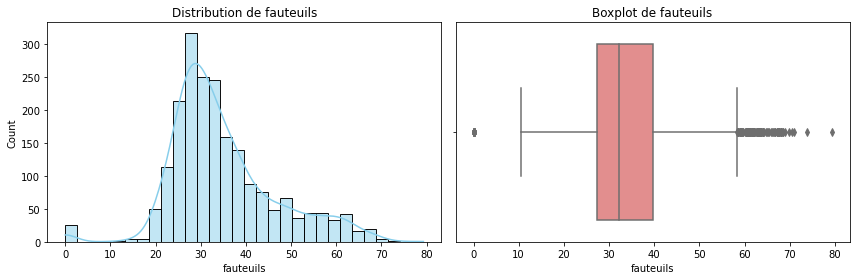

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  79.27550566358424
La moyenne de cette variable est :  34.807764137209205
Ecart-type :  11.645558646541264 . 
 C'est à dire que les valeurs sont écarté d'environ 11.645558646541264 autour de la moyenne
Q1  27.42032443008637 
 C'est à dire que 25% des valeurs sont inférieur à 27.42032443008637.
Q2 :  32.10839141175283 
 C'est à dire que 50% des valeurs sont inférieur à 32.10839141175283.
Q3:  39.81506867789708 
 C'est à dire que 75% des valeurs sont inférieur à 39.81506867789708.
Ecart interquartile : 12.39474424781071 
 C'est à dire que 50% des valeurs sont comprise entre 27.42032443008637 et 39.81506867789708.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  21.299337384969135
95%  59.23868416385306
99%  66.96157769297565

-------------------------------------
ASYMETRIE
---

<ipython-input-28-944074fe5789>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=np.log1p(X[col])**2


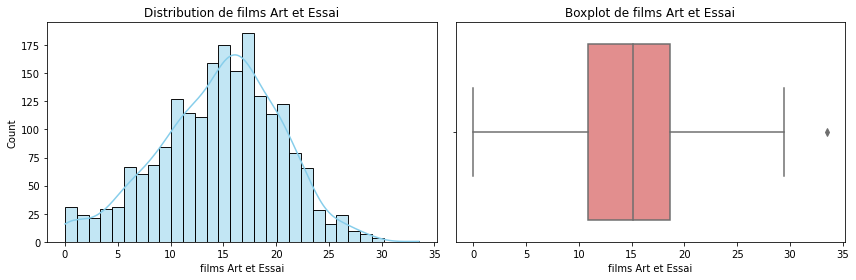

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
La valeur minimum est :  0.0
La valeur maximum est  :  33.523638780576555
La moyenne de cette variable est :  14.671697428302693
Ecart-type :  5.725632843384664 . 
 C'est à dire que les valeurs sont écarté d'environ 5.725632843384664 autour de la moyenne
Q1  10.862540647313239 
 C'est à dire que 25% des valeurs sont inférieur à 10.862540647313239.
Q2 :  15.146265232785886 
 C'est à dire que 50% des valeurs sont inférieur à 15.146265232785886.
Q3:  18.640703610527325 
 C'est à dire que 75% des valeurs sont inférieur à 18.640703610527325.
Ecart interquartile : 7.778162963214086 
 C'est à dire que 50% des valeurs sont comprise entre 10.862540647313239 et 18.640703610527325.

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.19218120556728158
5%  4.324077125263812
95%  23.157118270091047
99%  26.897090934734173

---------------------------

<ipython-input-28-944074fe5789>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=np.log1p(X[col])**2


In [28]:
var_encore_a_transfo2=[]
for col in var_encore_a_transfo:
    v_transfo=np.log1p(X[col])**2
    var_encore_a_transfo2=analyse_quanti(v_transfo,col,var_encore_a_transfo2)
    X[col]=np.log1p(X[col])**2

On remarque maintenant que nos distributions sont quasiment symétrique sans trop de valeurs aberrantes. 

Nous allons maintenant encoder nos variables. Pour cela, nous allos utiliser la fonction LabelEncoder.

In [ ]:
# Encodage ordinal de toutes les variables qualitatives
cat_cols = X.select_dtypes(include=['object', 'category']).columns
le=LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

X.head()

,population de la commune,fauteuils,entrées 2019,évolution entrées,PdM en entrées des films français,PdM en entrées des films américains,PdM en entrées des films européens,PdM en entrées des autres films,films Art et Essai,nom,tranche d'entrées,propriétaire
0,10.510396,37.295729,10.811343,-0.609129,48.828477,5.617302,26.364274,19.189947,17.033238,516,1,1452
1,10.992201,44.018360,12.093760,-0.691013,47.164687,42.301564,10.492106,0.041643,12.435219,1498,12,1484
2,10.992201,40.749157,12.951024,-0.911199,6.970587,49.983999,35.586070,7.459343,17.425509,1162,7,1227
3,10.655587,54.366649,12.782888,-0.651129,43.581092,38.321923,15.690302,2.406683,14.658495,1495,2,1484
4,10.655587,42.518500,11.885792,-0.302043,55.906646,24.321310,13.339912,6.432131,15.146265,1196,2,1227


Le tableau ci-dessous est un aperçu de notre dataset près à être modélisé.

### Modélisation

#### Création du modèle

Notre modèle est une régression linéaire, elle possèdera donc l'équation suivante: 
$$
\hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p
$$

Avant de commencé à calculer nos coefficients, nous allons séparer notre jeu de données en échantillons d'entrainements et de test. 80% de nos données seront utilisées pour entrainées notre modèle et les 20% restant seront utilisé pour évaluer notre modèle.

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Pour calculer nos coeffiencient, nous allons appliquer la formule suivante:
$$
\beta = (X^\top X)^{-1} X^\top \mathbf{y}
$$

In [59]:
def calcul_beta(x_train,y_train):
    """
    Fonction qui calcul les coefficient beta
    Param: 
        - x_train: Jeu de données d'entrainement
    Return:
        - beta: Coefficient calculer
    """
    #Creation de la matrice X
    #On ajoute une colonne à la matrice pour calculer beta_0
    X = np.c_[np.ones(x_train.shape[0]), x_train]
    
    #Calcul du déterminant de la matrice
    det = np.linalg.det(np.dot(X.T, X))
    if det != 0:
        print("La matrice est inversible.")
    else:
        print("La matrice n'est pas inversible")
        
    #Utilisation du rang de la matrice
    nb_lignes = X.shape[0]
    nb_colonnes = X.shape[1]

    if nb_lignes == nb_colonnes:
        rank = np.linalg.matrix_rank(np.dot(X.T, X))

        if rank == nb_colonnes:
            print("La matrice est carrée et inversible.")
        else:
            print("La matrice n'est non inversible.")
    else:
        print("La matrice n'est pas carrée.")
    
    #Transposition et inversion de la matrice
    Xt = X.T
    XtX_inv = np.linalg.inv(np.dot(Xt, X))
    
    #Calcul des beta
    B = np.dot(XtX_inv, Xt)
    beta = np.dot(B, y_train)
    
    #Affichage des coefficients
    print("Beta 0: ", beta[0])
    for i in range(1, len(beta)):
        print(f"Beta {i} = ", beta[i])
        
    return beta

Avec cette formule, nous obtenons les coefficients suivants:

In [60]:
beta_hat=calcul_beta(X_train,y_train)

La matrice est inversible.
La matrice n'est pas carrée.
Beta 0:  422549.9401110932
Beta 1 =  315.5641144470994
Beta 2 =  3734.645235464282
Beta 3 =  2091.106941542871
Beta 4 =  234.026834007937
Beta 5 =  -5771.561787234781
Beta 6 =  -5773.961652407797
Beta 7 =  -5442.444266187253
Beta 8 =  -5781.453067635457
Beta 9 =  866.8396049110609
Beta 10 =  12.159441487269557
Beta 11 =  5.381664902322655
Beta 12 =  8.11221104503501


Nous allons maintenant prédire les valeurs de notre jeu de données de test afin d'évaluer:
- les résidues du modèle
- les performances du modèle

In [61]:
#On n'oublie pas d'ajouter la colonne correspondant au beta_0
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

#Predictions
y_pred = np.dot(X_test, beta_hat)

#Residus
residuals = y_test - y_pred

#### Evaluation du modèle

In [81]:
def test_residu(resi,test,pred):
    """
    Fonction qui test les différentes hypothèse sur les résidus du modèle
    Param:
        - resi : Residues calculés
        - test: Jeu de données de test
    Return:
        - None
    """
    # Het-Bresuchpagan
    bp_test = het_breuschpagan(resi, test)
    labels = ["LM Statistic", "LM p-value", "F-statistic", "F p-value"]
    results = dict(zip(labels, bp_test))

    if results["F p-value"] < 0.05:
        print("Hétéroscédasticité détectée : la variance des résidus n'est pas constante.")
        print("- Cela viole une hypothèse clé de la régression linéaire.")
        print("- Envisage une transformation, une pondération, ou un modèle robuste.")
    else:
        print("- Homoscédasticité : la variance des résidus semble constante.")
        print("- L'hypothèse d'homoscédasticité est acceptable.")
        
    # Shapiro-Wilk
    shapiro_stat, shapiro_pvalue = shapiro(resi)
    print(f"Statistique de Shapiro-Wilk : {shapiro_stat:.4f}")
    print(f"p-value : {shapiro_pvalue:.4f}")
    if shapiro_pvalue < 0.05:
        print("- Les résidus ne suivent pas une loi normale (H0 rejetée).")
    else:
        print("- Les résidus suivent une loi normale (H0 non rejetée).")
        
    # Anderson Darling
    result = anderson(resi, dist='norm')
    print(f"Statistique d'Anderson-Darling : {result.statistic:.4f}")
    print("Seuils critiques et interprétation :")
    for cv, sig in zip(result.critical_values, result.significance_level):
        print(f"  - Niveau {sig}% : seuil critique = {cv:.4f}")
    print("")
    if result.statistic > result.critical_values[2]:  # seuil à 5%
        print("-Les résidus ne suivent pas une loi normale (H0 rejetée au seuil de 5%).")
    else:
        print("-Les résidus suivent une loi normale (H0 non rejetée au seuil de 5%).")
    
    #Graphique plt.figure(figsize=(8, 5))
    sns.scatterplot(x=pred, y=resi, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Résidus")
    plt.title("Graphique des résidus vs valeurs prédites")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def ajust_model(feat_train,target_train):
    """
    Fonction qui ajuste et test la signicativité du modèle
    Param:
        - feat_train : Jeu de données d'entrainement des caractéristique
        - target_train : Jeu de données d'entrainement de la variables cibles
    Return:
        - None
    """
    # Ajustement du modèle
    X_train_const = np.c_[np.ones(feat_train.shape[0]), feat_train]
    model = sm.OLS(target_train, feat_train).fit()

    # Récupération de la statistique F et de la p-value
    f_stat = model.fvalue
    f_pval = model.f_pvalue

    # Affichage des résultats
    print(f"Statistique de Fisher : {f_stat:.4f}")
    print(f"p-value associée : {f_pval:.4f}")

    # Interprétation
    alpha = 0.05
    if f_pval < alpha:
        print("→ Le modèle est globalement significatif (H0 rejetée).")
    else:
        print("→ Le modèle n'est pas globalement significatif (H0 non rejetée).")

def eval_model(test,pred):
    """
    Fonction qui calcul les métriques d'évaluations du modèle
    Param:
        - test: Jeu de données de test
        - pred: Prédiction calculé par le modèle
    Return: 
        - None
    """
    # MAE
    mae = mean_absolute_error(test, pred)

    # MSE
    mse = mean_squared_error(test, pred)

    # RMSE
    rmse = np.sqrt(mse)

    # R²
    r2 = r2_score(test, pred)

    # R² ajusté
    n = len(test)          # nombre d'observations
    p = 1           # nombre de variables explicatives

    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Affichage
    print(f"MAE  (Mean Absolute Error)        : {mae:.4f}")
    print(f"MSE  (Mean Squared Error)         : {mse:.4f}")
    print(f"RMSE (Root Mean Squared Error)    : {rmse:.4f}")
    print(f"R²   (Coefficient de détermination): {r2:.4f}")
    print(f"R² ajusté : {r2_adj:.4f}")

Dans un premier temps, nous allons regarder le résidues du modèle. C'est à dire, la différence entre nos valeurs prédites par notre modèle et les valeurs de notre variables cible contenue dans notre échantillon de test.

Hétéroscédasticité détectée : la variance des résidus n'est pas constante.
- Cela viole une hypothèse clé de la régression linéaire.
- Envisage une transformation, une pondération, ou un modèle robuste.
Statistique de Shapiro-Wilk : 0.8387
p-value : 0.0000
- Les résidus ne suivent pas une loi normale (H0 rejetée).
Statistique d'Anderson-Darling : 13.1744
Seuils critiques et interprétation :
  - Niveau 15.0% : seuil critique = 0.5710
  - Niveau 10.0% : seuil critique = 0.6500
  - Niveau 5.0% : seuil critique = 0.7790
  - Niveau 2.5% : seuil critique = 0.9090
  - Niveau 1.0% : seuil critique = 1.0820

-Les résidus ne suivent pas une loi normale (H0 rejetée au seuil de 5%).


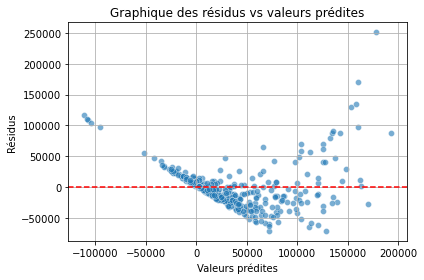

Statistique de Fisher : 250.1879
p-value associée : 0.0000
→ Le modèle est globalement significatif (H0 rejetée).


In [79]:
test_residu(residuals,X_test, y_pred)
ajust_model(X_train,y_train)

Avec les différents test suivants, nous remarquons que les résidues du modèle ne respectent pas certaines hypothèse comme l'hypothèse qui dit que les résidues doivent suivre une loi normal. Cela se remarque sur le graphique. Si toute les conditions étaient respecté, nous devrions avoir tout nos points quasiment aligné. Ce non-respect des hypothèse pourrait avoir un impact négatifs sur le performance de notre modèle. 
Malgré cela, notre modèle est néanmoins significatifs.

Evaluons maintenant notre modèle:

In [82]:
eval_model(y_test,y_pred)

MAE  (Mean Absolute Error)        : 22044.9291
MSE  (Mean Squared Error)         : 1128633016.4828
RMSE (Root Mean Squared Error)    : 33595.1338
R²   (Coefficient de détermination): 0.6329
R² ajusté : 0.6320


Les métriques R² qui sont de 0,63 pour ce modèles indique des performances moyenne de notre modèle. Nous allons maintenant essayer d'optimiser ces performances. 

### Optimisation du modèle (si nécessaire)

#### Sélection automatique de variable

Nous avions garder 12 caractéristique dans le premier modèle ci-dessus, nous allons maintenant essayer de voir si toute ces variables ont réelement un impact sur la prédiction de notre variable cible. Pour cela, nous allons utiliser une sélection pas à pas. C'est à dire qu'il va ajouter ou supprimer des variables puis comparer les AIC des modèles. L'AIC est un indicateur de performances du modèle.

In [84]:
def stepwise_selection(X, y, criterion='aic', verbose=True):
    remaining_vars = list(X.columns)
    selected_vars = []
    history = []
    current_score = float('inf')
    iteration = 1
    best_new_score = None

    while True:
        changed = False
        scores_with_add = []

        # Étape forward : test d'ajout de variables
        if verbose:
            if best_new_score is not None:
              print(f"\nÉtape {iteration} - Phase d'ajout (Meileur AIC : {best_new_score:.2f})")
            else:
              print(f"\nÉtape {iteration} - Phase d'ajout")
            print(f"Variables actuellement sélectionnées : {selected_vars if selected_vars else 'aucune'}")
            print("Évaluation des ajouts possibles :")

        for candidate in remaining_vars:
            trial_vars = selected_vars + [candidate]
            X_trial = sm.add_constant(X[trial_vars])
            model = sm.OLS(y, X_trial).fit()
            score = model.aic if criterion == 'aic' else model.bic
            scores_with_add.append((score, candidate))
            if verbose:
                print(f"  - Ajout de {candidate:<22} → Modèle : {trial_vars} | {criterion.upper()} = {score:.2f}")

        if scores_with_add:
            scores_with_add.sort()
            best_new_score, best_candidate = scores_with_add[0]

            if best_new_score < current_score:
                selected_vars.append(best_candidate)
                remaining_vars.remove(best_candidate)
                current_score = best_new_score
                history.append((len(selected_vars), f"+ {best_candidate}", best_new_score))
                changed = True
                if verbose:
                    print(f">>> Variable ajoutée : '{best_candidate}'")
                    print(f"    {criterion.upper()} après ajout : {best_new_score:.2f}")

        # Étape backward : test de suppression de variables
        scores_with_remove = []
        if len(selected_vars) > 1:
            if verbose:
                print(f"\nÉtape {iteration} - Phase de suppression (Meileur AIC : {best_new_score:.2f})")
                print("Évaluation des suppressions possibles :")

            for candidate in selected_vars:
                trial_vars = [var for var in selected_vars if var != candidate]
                X_trial = sm.add_constant(X[trial_vars])
                model = sm.OLS(y, X_trial).fit()
                score = model.aic if criterion == 'aic' else model.bic
                scores_with_remove.append((score, candidate))
                if verbose:
                    print(f"  - Suppression de {candidate:<22} → Modèle : {trial_vars} | {criterion.upper()} = {score:.2f}")

            scores_with_remove.sort()
            best_new_score, worst_candidate = scores_with_remove[0]

            if best_new_score < current_score:
                selected_vars.remove(worst_candidate)
                remaining_vars.append(worst_candidate)
                current_score = best_new_score
                history.append((len(selected_vars), f"- {worst_candidate}", best_new_score))
                changed = True
                if verbose:
                    print(f">>> Variable supprimée : '{worst_candidate}'")
                    print(f"    {criterion.upper()} après suppression : {best_new_score:.2f}")

        if not changed:
            if verbose:
                print("Aucune amélioration possible. Fin de la sélection pas à pas.")
            break

        iteration += 1

    # Modèle final
    final_model = sm.OLS(y, sm.add_constant(X[selected_vars])).fit()

    return final_model, selected_vars, history

In [ ]:
model,var_select,hist=stepwise_selection(X_train,y_train)


Étape 1 - Phase d'ajout
Variables actuellement sélectionnées : aucune
Évaluation des ajouts possibles :
  - Ajout de population de la commune → Modèle : ['population de la commune'] | AIC = 40460.15
  - Ajout de fauteuils              → Modèle : ['fauteuils'] | AIC = 39494.62
  - Ajout de entrées 2019           → Modèle : ['entrées 2019'] | AIC = 40750.12
  - Ajout de évolution entrées      → Modèle : ['évolution entrées'] | AIC = 40705.27
  - Ajout de PdM en entrées des films français → Modèle : ['PdM en entrées des films français'] | AIC = 40750.33
  - Ajout de PdM en entrées des films américains → Modèle : ['PdM en entrées des films américains'] | AIC = 40752.59
  - Ajout de PdM en entrées des films européens → Modèle : ['PdM en entrées des films européens'] | AIC = 40751.21
  - Ajout de PdM en entrées des autres films → Modèle : ['PdM en entrées des autres films'] | AIC = 40754.11
  - Ajout de films Art et Essai     → Modèle : ['films Art et Essai'] | AIC = 40655.93
  - Ajout de n

Avec cette méthode de sélection, nous avons pu supprimer des variables "inutiles" d'un point de vue mathématique de notre modèle initial. Nous allons maintenant réentrainé un modèle qui contient les variables suivantes:

In [86]:
for i in var_select:
    print(i)

fauteuils
nom
films Art et Essai
propriétaire
évolution entrées
entrées 2019
PdM en entrées des films européens


#### Création du modèle

Nous allons maintenant récréer et réentrainer un modèle avec nos variables préalablement sélectionné avec la méthode pas à pas. Nous obtenons donc le coefficient suivant:

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train_reduced = X_train[var_select]
X_test_reduced = X_test[var_select]

beta_hat_reduced=calcul_beta(X_train_reduced,y_train)

#On n'oublie pas d'ajouter la colonne correspondant au beta_0
X_test_reduced = np.c_[np.ones(X_test_reduced.shape[0]), X_test_reduced]

#Predictions
y_pred_reduced = np.dot(X_test_reduced, beta_hat)

#Residus
residuals = y_test - y_pred_reduced

La matrice est inversible.
La matrice n'est pas carrée.
Beta 0:  -152961.459273435
Beta 1 =  3753.6444506813923
Beta 2 =  12.127864855854064
Beta 3 =  887.5805737217082
Beta 4 =  8.16578171208771
Beta 5 =  234.92750211571615
Beta 6 =  2114.69724062324
Beta 7 =  329.41396984926416


#### Evaluation du modèle

Nous réévaluons donc ensuite notre nouveau modèle. Commençons par nos résidues.

Hétéroscédasticité détectée : la variance des résidus n'est pas constante.
- Cela viole une hypothèse clé de la régression linéaire.
- Envisage une transformation, une pondération, ou un modèle robuste.
Statistique de Shapiro-Wilk : 0.8390
p-value : 0.0000
- Les résidus ne suivent pas une loi normale (H0 rejetée).
Statistique d'Anderson-Darling : 13.1042
Seuils critiques et interprétation :
  - Niveau 15.0% : seuil critique = 0.5710
  - Niveau 10.0% : seuil critique = 0.6500
  - Niveau 5.0% : seuil critique = 0.7790
  - Niveau 2.5% : seuil critique = 0.9090
  - Niveau 1.0% : seuil critique = 1.0820

-Les résidus ne suivent pas une loi normale (H0 rejetée au seuil de 5%).


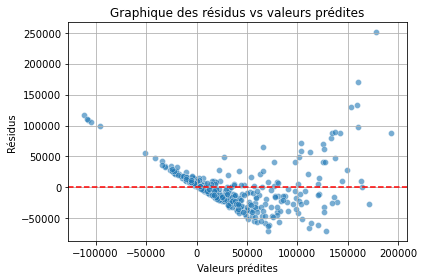

Statistique de Fisher : 315.7488
p-value associée : 0.0000
→ Le modèle est globalement significatif (H0 rejetée).


In [93]:
test_residu(residuals,X_test_reduced, y_pred_reduced)
ajust_model(X_train_reduced,y_train)

Comme pour notre premier modèle, les hypothèses de nos résidues ne sont pas validé. Regardons maintenant les performances de notre modèle.

In [94]:
eval_model(y_test, y_pred_reduced)

MAE  (Mean Absolute Error)        : 22076.8546
MSE  (Mean Squared Error)         : 1128108216.5739
RMSE (Root Mean Squared Error)    : 33587.3223
R²   (Coefficient de détermination): 0.6331
R² ajusté : 0.6322


On remarque une très légère amélioration de nos R². Cependant, il reste trop faible pour dire que notre modèle est performant.

## Conclusion 

Après avoir nettoyer notre jeu de données, étudier les différentes variables qu'il contenait et avoir fait une pré-sélection de nos variables, nous avons entrainé un premier modèle de régression qui n'était pas assez performants. Nous avons donc essayer d'optimiser notre modèle en faisant une sélection automatiser de nos variables avec une méthode pas à pas. Cela n'a que très impacter les performances de notre modèle.

Pour essayer d'optimiser encore notre modèle, on pourrait essayer d'ajouter un méthode régularisation comme Ridge ou Lasso.